<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;"> (Predict Survival on the Titanic) </h1></center>

***
***
# 1.About the Dataset



<center><img src="https://static.nationalgeographicla.com/files/styles/image_3200/public/nationalgeographic762774.jpg?w=1600"></center>



* **Survival**	Did the person survive? (0 = No, 1 = Yes)	
* **Pclass**	Ticket class
* **Sex**	Person gender
* **Age** Age in years

* **Age** Age in years
* **Sibsp** Number of siblings / spouses aboard the Titanic
* **Parch** Number of parents / children aboard the Titanic	
* **Ticket** Ticket number
* **Fare** Passenger fare
* **Cabin** Cabin number
* **Embarked** Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

***
***
# 2. Importing Libraries and Dataset

Here are all the libraries we will use to do our analysis.

In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
import warnings
from collections import Counter
import plotly.express as px

import re
import time
import math
from datetime import datetime as dt

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', None)

plt.style.use('dark_background')

In [496]:
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

%matplotlib inline
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

Let's combine the test set which is divide in two dataframes

In [497]:
df_test_sol = pd.read_csv('gender_submission.csv')
df_test_sol

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [498]:
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [499]:
df_test = df_test.merge(df_test_sol,how='inner',on=['PassengerId'])
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [500]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


***
***
# 3. Cleaning Data

In [501]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [502]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [503]:
df_train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [504]:
df_test.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
Survived       0.000000
dtype: float64

In [505]:
df_train.duplicated().sum()

0

In [506]:
df_test.duplicated().sum()

0

In [507]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [508]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [509]:
df_train['Title'] = df_train['Name'].str.split('.',expand=True)[0].str.split(',',expand=True)[1].str.strip()
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [510]:
df_test['Title'] = df_test['Name'].str.split('.',expand=True)[0].str.split(',',expand=True)[1].str.strip()
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,Mr


In [511]:
df_train['Title'].value_counts(normalize=True,dropna=True)

Mr              0.580247
Miss            0.204265
Mrs             0.140292
Master          0.044893
Dr              0.007856
Rev             0.006734
Mlle            0.002245
Major           0.002245
Col             0.002245
the Countess    0.001122
Capt            0.001122
Ms              0.001122
Sir             0.001122
Lady            0.001122
Mme             0.001122
Don             0.001122
Jonkheer        0.001122
Name: Title, dtype: float64

In [512]:
df_test['Title'].value_counts(normalize=True,dropna=True)

Mr        0.574163
Miss      0.186603
Mrs       0.172249
Master    0.050239
Col       0.004785
Rev       0.004785
Ms        0.002392
Dr        0.002392
Dona      0.002392
Name: Title, dtype: float64

***
*Now let's replace the empty spaces*

In [513]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [514]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
Title            0
dtype: int64

In [515]:
df_combine = pd.concat([df_train,df_test])
df_combine.reset_index(drop=True,inplace=True)

In [516]:
df_combine_age = df_combine.groupby(['Title'])['Age'].agg(['mean','median']).reset_index()
df_combine_age.rename(columns={'mean':'Age Mean','median':'Age Median'},inplace=True)
df_combine_age

,Title,Age Mean,Age Median
0,Capt,70.000000,70.0
1,Col,54.000000,54.5
2,Don,40.000000,40.0
3,Dona,39.000000,39.0
4,Dr,43.571429,49.0
5,Jonkheer,38.000000,38.0
6,Lady,48.000000,48.0
7,Major,48.500000,48.5
8,Master,5.482642,4.0
9,Miss,21.774238,22.0


In [517]:
df_train2 = df_train.merge(df_combine_age,on='Title',how='left')
df_train2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age Mean,Age Median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,32.252151,29.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,36.994118,35.5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,21.774238,22.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,36.994118,35.5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,32.252151,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,41.250000,41.5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,21.774238,22.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,21.774238,22.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,32.252151,29.0


In [518]:
df_train2['Age'].fillna(df_train2['Age Median'],inplace=True)
df_train2.drop(columns=['Age Mean','Age Median'],inplace=True)

In [519]:
df_train2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [520]:
df_test2 = df_test.merge(df_combine_age,on='Title',how='left')
df_test2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,Age Mean,Age Median
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr,32.252151,29.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs,36.994118,35.5
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr,32.252151,29.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr,32.252151,29.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs,36.994118,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,Mr,32.252151,29.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,Dona,39.000000,39.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr,32.252151,29.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,Mr,32.252151,29.0


In [521]:
df_test2['Age'].fillna(df_test2['Age Median'],inplace=True)
df_test2.drop(columns=['Age Mean','Age Median'],inplace=True)

In [522]:
df_test2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
Title            0
dtype: int64

Let's fill the embark missing values

In [523]:
df_train_embark = df_combine.groupby(['Embarked','Title'])['Title'].agg(['count']).reset_index()
df_train_embark.sort_values(by=['Title','count'],ascending=[True,False],inplace=True)
#df_age.rename(columns={'mean':'Age Mean','median':'Age Median'},inplace=True)
df_train_embark

,Embarked,Title,count
19,S,Capt,1
0,C,Col,3
20,S,Col,1
1,C,Don,1
2,C,Dona,1
21,S,Dr,5
3,C,Dr,2
12,Q,Dr,1
22,S,Jonkheer,1
4,C,Lady,1


In [524]:
df_train_embark[~df_train_embark.duplicated(subset=['Title'])]

,Embarked,Title,count
19,S,Capt,1
0,C,Col,3
1,C,Don,1
2,C,Dona,1
21,S,Dr,5
22,S,Jonkheer,1
4,C,Lady,1
23,S,Major,2
24,S,Master,45
25,S,Miss,155


In [525]:
df_train_embark2 = df_train_embark[~df_train_embark.duplicated(subset=['Title'])].reset_index(drop=True)
df_train_embark2.rename(columns={'count':'Max Num','Embarked':'Missing Embarked'},inplace=True)
df_train_embark2

,Missing Embarked,Title,Max Num
0,S,Capt,1
1,C,Col,3
2,C,Don,1
3,C,Dona,1
4,S,Dr,5
5,S,Jonkheer,1
6,C,Lady,1
7,S,Major,2
8,S,Master,45
9,S,Miss,155


In [526]:
df_train3 = df_train2.merge(df_train_embark2,on='Title',how='left')
df_train3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Missing Embarked,Max Num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,S,562
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,S,133
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,S,155
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,S,133
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,S,562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,S,7
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,S,155
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,S,155
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,S,562


In [527]:
df_train3['Embarked'].fillna(df_train3['Missing Embarked'],inplace=True)
df_train3.drop(columns=['Missing Embarked','Max Num'],inplace=True)

Since there's not missing values in the column Embarked for the test dataset, we don't need to make other adjusment. How ever there's a missing

In [528]:
df_test2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
Title            0
dtype: int64

In [529]:
df_test2[df_test2['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0,Mr


In [530]:
df_test2['Fare'].fillna(round(df_test2[(df_test2['Sex']=='male')&(df_test2['Pclass']==3)&(df_test2['Embarked']=='S')&(df_test2['Title']=='Mr')]['Fare'].mean(),1),inplace=True)

In [531]:
df_test2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
Title            0
dtype: int64

In [532]:
df_train3.drop(columns=['PassengerId','Cabin','Ticket','Name'],inplace=True)

In [533]:
df_test2.drop(columns=['PassengerId','Cabin','Ticket','Name'],inplace=True)

In [534]:
df_train3['Age'] = df_train3['Age'].astype('int')
df_test2['Age'] = df_test2['Age'].astype('int')

***
***
# 4. Exploratory Data Analysis

In [541]:
df_explo = pd.concat([df_train3,df_test2])
df_explo.reset_index(drop=True,inplace=True)
df_explo

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22,1,0,7.2500,S,Mr
1,1,1,female,38,1,0,71.2833,C,Mrs
2,1,3,female,26,0,0,7.9250,S,Miss
3,1,1,female,35,1,0,53.1000,S,Mrs
4,0,3,male,35,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
1304,0,3,male,29,0,0,8.0500,S,Mr
1305,1,1,female,39,0,0,108.9000,C,Dona
1306,0,3,male,38,0,0,7.2500,S,Mr
1307,0,3,male,29,0,0,8.0500,S,Mr


In [542]:
num_columns=[]
str_columns=[]
for i in df_explo.columns:
    
    if df_explo[i].dtype in (['int64','float64']):
        num_columns.append(i)
        
    else:
        str_columns.append(i)

In [543]:
num_columns

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [544]:
str_columns

['Sex', 'Embarked', 'Title']

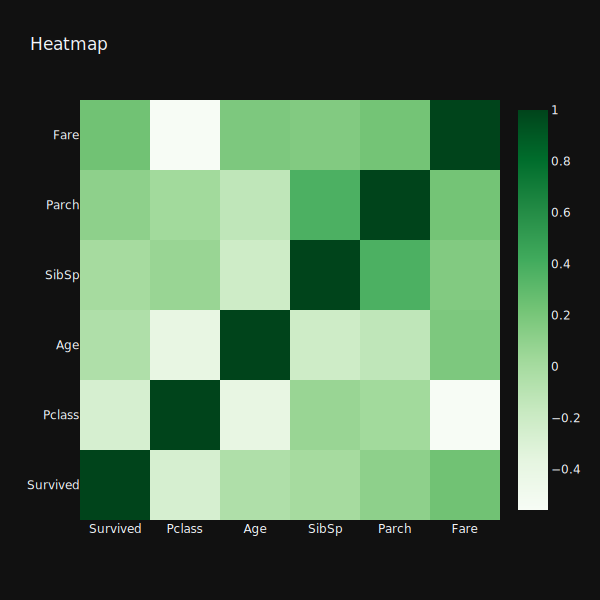

In [545]:
heatmap = go.Heatmap(
    z=df_explo[num_columns].corr(),x=df_explo[num_columns].columns,y=df_explo[num_columns].columns,
    colorscale='Greens',  # Choose a color scale from Plotly's list of color scales
    showscale=True,       # Display the color scale legend
)

fig = go.Figure(data=[heatmap])

fig.update_layout(template='plotly_dark',title='Heatmap' , width=600, height=600)

fig.show('svg')

INTEGER VARIABLES: 

-------------------------------------------------------
Age: 

(-0.081, 8.0]    0.061115
(8.0, 16.0]      0.047364
(16.0, 24.0]     0.248281
(24.0, 32.0]     0.328495
(32.0, 40.0]     0.142857
(40.0, 48.0]     0.080214
(48.0, 56.0]     0.050420
(56.0, 64.0]     0.031322
(64.0, 72.0]     0.007639
(72.0, 80.0]     0.002292
Name: Age, dtype: float64
-------------------------------------------------------
Fare: 

(-0.513, 51.233]      0.818182
(51.233, 102.466]     0.117647
(102.466, 153.699]    0.032086
(153.699, 204.932]    0.003056
(204.932, 256.165]    0.016043
(256.165, 307.398]    0.009931
(307.398, 358.63]     0.000000
(358.63, 409.863]     0.000000
(409.863, 461.096]    0.000000
(461.096, 512.329]    0.003056
Name: Fare, dtype: float64
-------------------------------------------------------
Survived: 

0    0.622613
1    0.377387
Name: Survived, dtype: float64



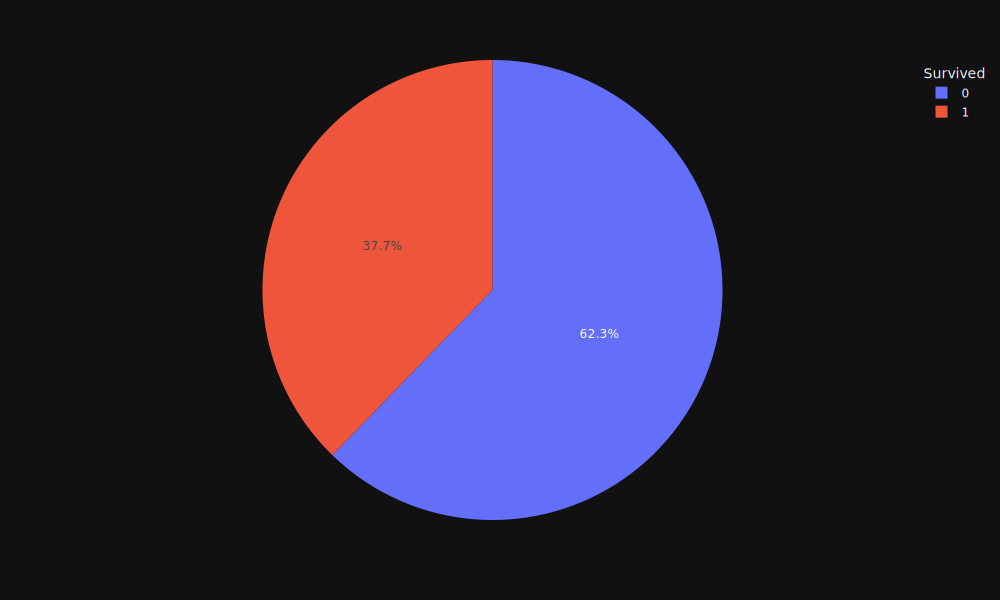

-------------------------------------------------------
Pclass: 

3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64



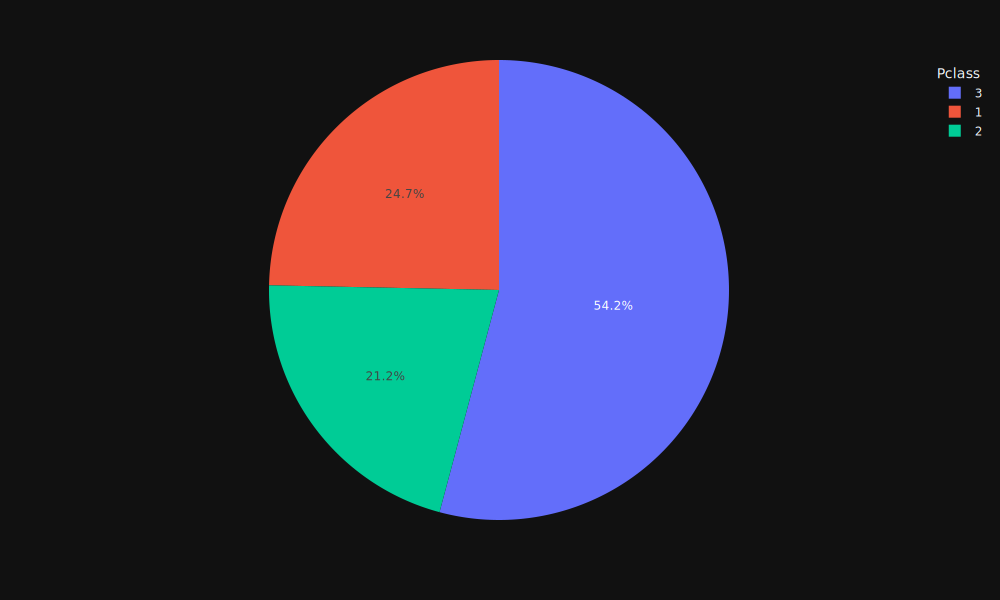

-------------------------------------------------------
SibSp: 

0    0.680672
1    0.243697
2    0.032086
4    0.016807
3    0.015279
8    0.006875
5    0.004584
Name: SibSp, dtype: float64



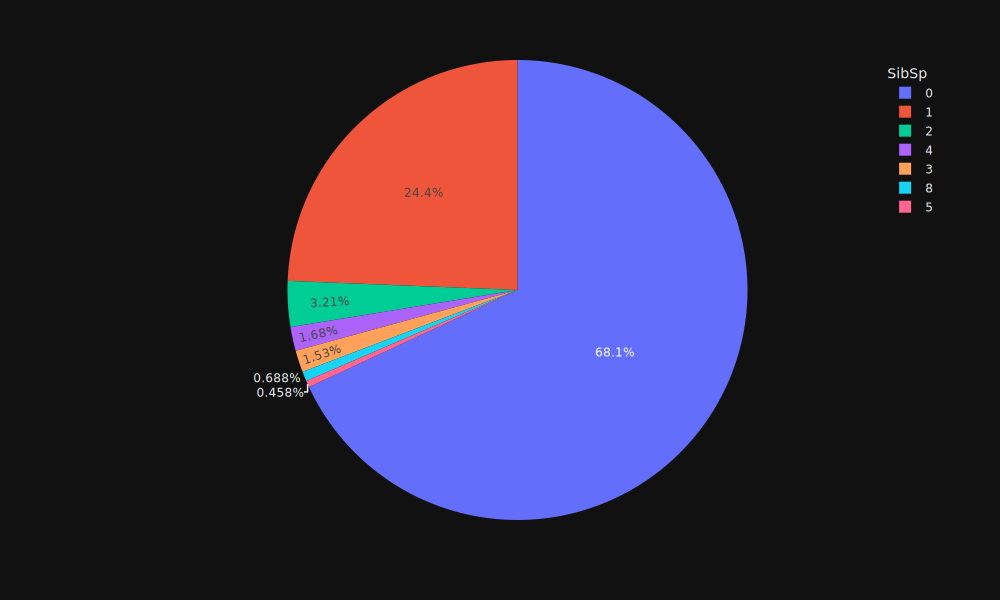

-------------------------------------------------------
Parch: 

0    0.765470
1    0.129870
2    0.086325
3    0.006112
5    0.004584
4    0.004584
6    0.001528
9    0.001528
Name: Parch, dtype: float64



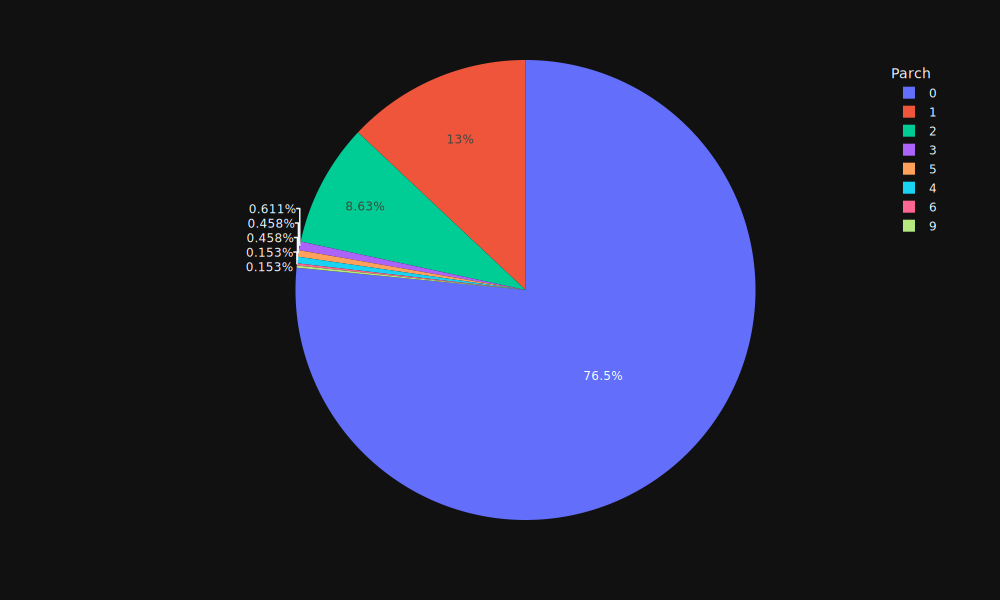

In [546]:
int_columns = num_columns.copy()

print('INTEGER VARIABLES: \n')

int_columns.remove('Age')
int_columns.remove('Fare')

print('-'*55)
print('Age: \n')
print(df_explo['Age'].value_counts(dropna=False,bins=10,sort=False,normalize=True))

print('-'*55)
print('Fare: \n')
print(df_explo['Fare'].value_counts(dropna=False,bins=10,sort=False,normalize=True))


for i in int_columns:
    print('-'*55)
    print(i+': \n')
    print(df_explo[i].value_counts(dropna=False,normalize=True))
    print()
    
    df1 = pd.DataFrame(df_explo[i].value_counts(dropna=False,normalize=True))
    df1.reset_index(inplace=True)
    df1.rename(columns={'index':i,i:'Percentage'},inplace=True)
    fig = px.pie(df1,values='Percentage',names=i)
    fig.update_layout(template='plotly_dark',legend_title_text=i, width=1000, height=600)
    fig.show('svg')

STRING VARIABLES: 

-------------------------------------------------------
Sex: 

male      0.647587
female    0.352413
Name: Sex, dtype: float64



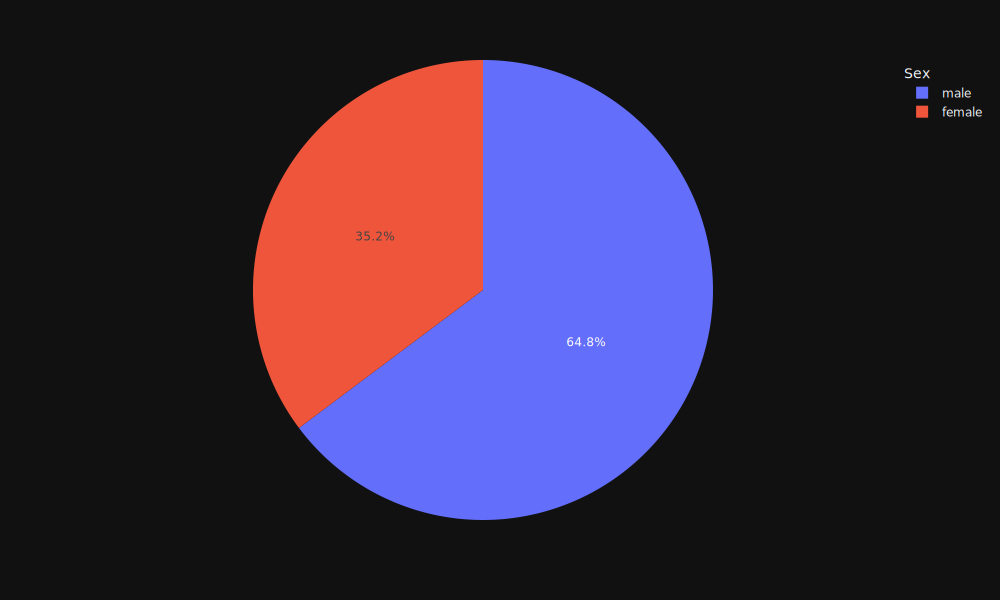

-------------------------------------------------------
Embarked: 

S    0.725028
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64



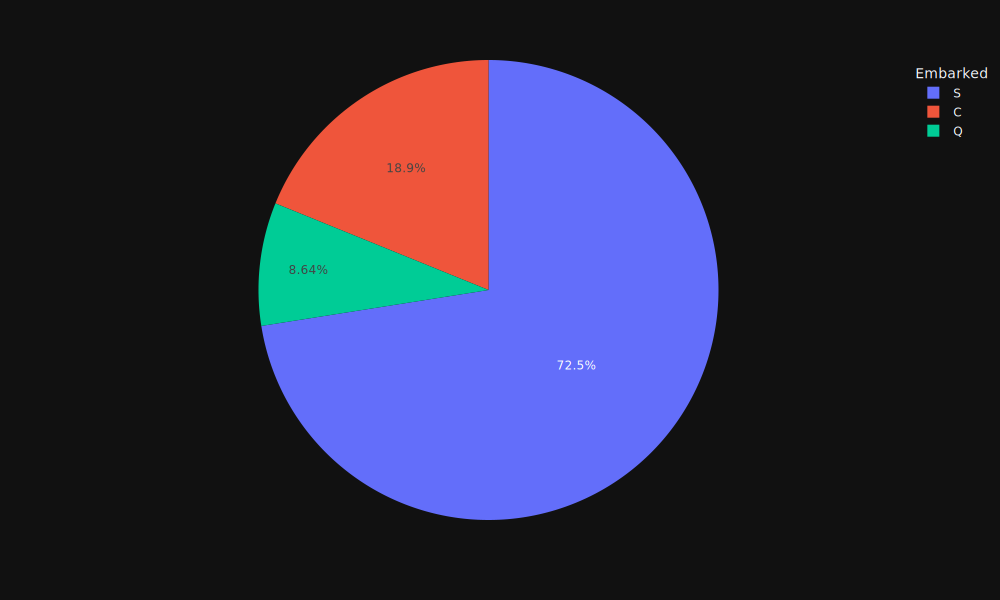

-------------------------------------------------------
Title: 

Mr              0.580247
Miss            0.204265
Mrs             0.140292
Master          0.044893
Dr              0.007856
Rev             0.006734
Mlle            0.002245
Major           0.002245
Col             0.002245
the Countess    0.001122
Capt            0.001122
Ms              0.001122
Sir             0.001122
Lady            0.001122
Mme             0.001122
Don             0.001122
Jonkheer        0.001122
Name: Title, dtype: float64



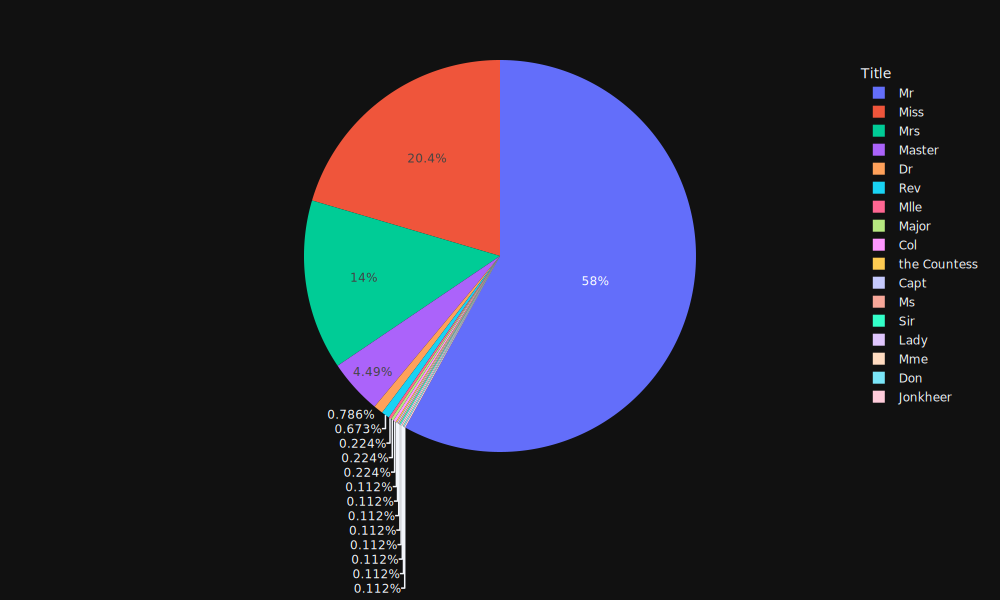

In [547]:
print('STRING VARIABLES: \n')


for i in str_columns:
    print('-'*55)
    print(i+': \n')
    print(df_train3[i].value_counts(dropna=False,normalize=True))
    print()
    
    df1 = pd.DataFrame(df_train3[i].value_counts(dropna=False,normalize=True))
    df1.reset_index(inplace=True)
    df1.rename(columns={'index':i,i:'Percentage'},inplace=True)
    fig = px.pie(df1,values='Percentage',names=i)
    fig.update_layout(template='plotly_dark',legend_title_text=i, width=1000, height=600)
    fig.show('svg')
    

### Bar Graphs

In [548]:
df_explo

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22,1,0,7.2500,S,Mr
1,1,1,female,38,1,0,71.2833,C,Mrs
2,1,3,female,26,0,0,7.9250,S,Miss
3,1,1,female,35,1,0,53.1000,S,Mrs
4,0,3,male,35,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
1304,0,3,male,29,0,0,8.0500,S,Mr
1305,1,1,female,39,0,0,108.9000,C,Dona
1306,0,3,male,38,0,0,7.2500,S,Mr
1307,0,3,male,29,0,0,8.0500,S,Mr


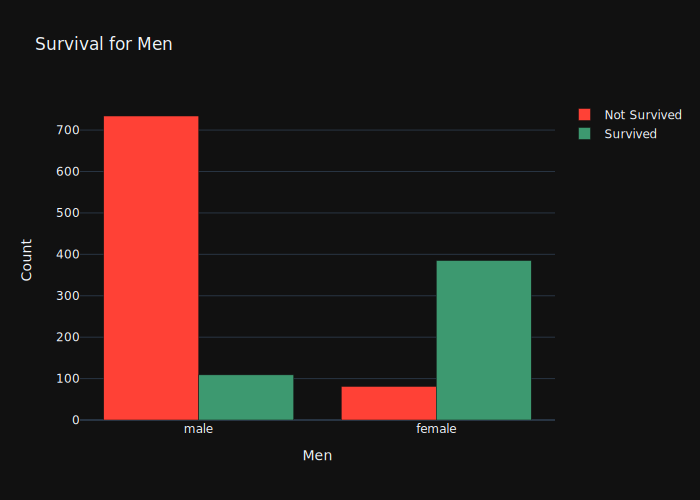

In [550]:
trace0 = go.Bar(
            x = df_explo[df_explo["Survived"]== 0]["Sex"].value_counts().index.values,
            y = df_explo[df_explo["Survived"]== 0]["Sex"].value_counts().values,
            name='Not Survived',marker=dict(color='#FF4136'))

trace1 = go.Bar(
            x = df_explo[df_explo["Survived"]== 1]["Sex"].value_counts().index.values,
            y = df_explo[df_explo["Survived"]== 1]["Sex"].value_counts().values,
            name='Survived',marker=dict(color='#3D9970'))

data = [trace0, trace1]


layout = go.Layout(
    yaxis=dict(title='Count'),
    xaxis=dict(title='Men'),
    title='Survival for Men')

fig = go.Figure(data=data, layout=layout)

fig.update_layout(template='plotly_dark')

fig.show('svg')

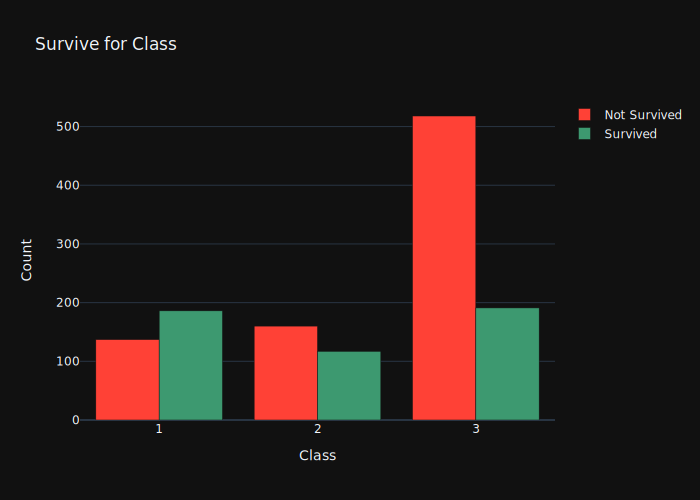

In [551]:
trace0 = go.Bar(
            x = df_explo[df_explo["Survived"]== 0]["Pclass"].value_counts().index.values,
            y = df_explo[df_explo["Survived"]== 0]["Pclass"].value_counts().values,
            name='Not Survived',marker=dict(color='#FF4136'))

trace1 = go.Bar(
            x = df_explo[df_explo["Survived"]== 1]["Pclass"].value_counts().index.values,
            y = df_explo[df_explo["Survived"]== 1]["Pclass"].value_counts().values,
            name='Survived',marker=dict(color='#3D9970'))

data = [trace0, trace1]


layout = go.Layout(
    yaxis=dict(title='Count'),
    xaxis=dict(title='Class'),
    title='Survive for Class')

fig = go.Figure(data=data, layout=layout)

fig.update_layout(template='plotly_dark')

fig.show('svg')

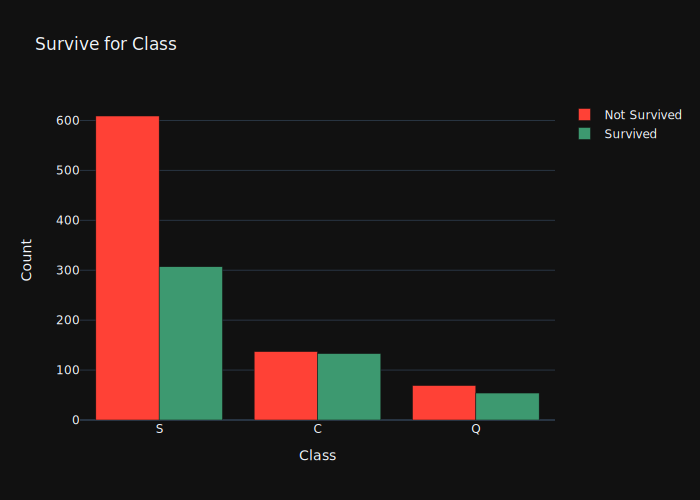

In [552]:
trace0 = go.Bar(
            x = df_explo[df_explo["Survived"]== 0]["Embarked"].value_counts().index.values,
            y = df_explo[df_explo["Survived"]== 0]["Embarked"].value_counts().values,
            name='Not Survived',marker=dict(color='#FF4136'))

trace1 = go.Bar(
            x = df_explo[df_explo["Survived"]== 1]["Embarked"].value_counts().index.values,
            y = df_explo[df_explo["Survived"]== 1]["Embarked"].value_counts().values,
            name='Survived',marker=dict(color='#3D9970'))

data = [trace0, trace1]


layout = go.Layout(
    yaxis=dict(title='Count'),
    xaxis=dict(title='Class'),
    title='Survive for Class')

fig = go.Figure(data=data, layout=layout)

fig.update_layout(template='plotly_dark')

fig.show('svg')

### Box Plot

In [553]:
df_explo

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22,1,0,7.2500,S,Mr
1,1,1,female,38,1,0,71.2833,C,Mrs
2,1,3,female,26,0,0,7.9250,S,Miss
3,1,1,female,35,1,0,53.1000,S,Mrs
4,0,3,male,35,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
1304,0,3,male,29,0,0,8.0500,S,Mr
1305,1,1,female,39,0,0,108.9000,C,Dona
1306,0,3,male,38,0,0,7.2500,S,Mr
1307,0,3,male,29,0,0,8.0500,S,Mr


In [554]:
df_survived = df_explo[df_explo["Survived"]== 1]
df_not_survived = df_explo[df_explo["Survived"]== 0]

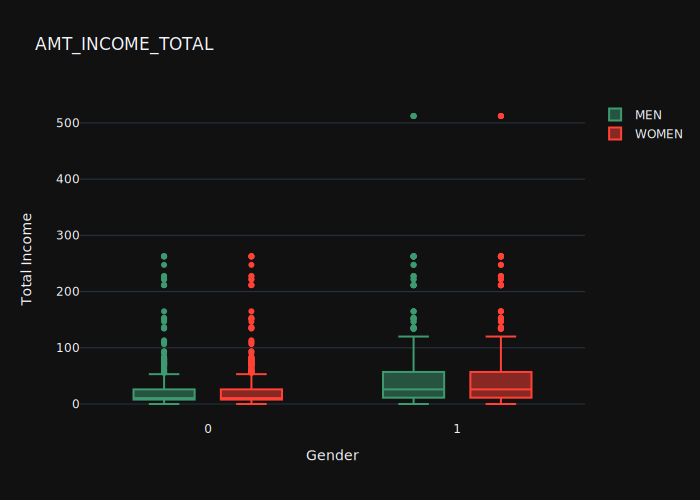

In [555]:
trace0 = go.Box(
    y=df_explo["Fare"],
    x=df_explo["Survived"],
    name='MEN',
    marker=dict(color='#3D9970'))

trace1 = go.Box(
    y=df_explo['Fare'],
    x=df_explo['Survived'],
    name='WOMEN',
    marker=dict(color='#FF4136'))
    
data = [trace0, trace1]

layout = go.Layout(yaxis=dict(title='Total Income',zeroline=False),
                   xaxis=dict(title='Gender'),title='AMT_INCOME_TOTAL',boxmode='group')
fig = go.Figure(data=data, layout=layout)

fig.update_layout(template='plotly_dark')

fig.show('svg')

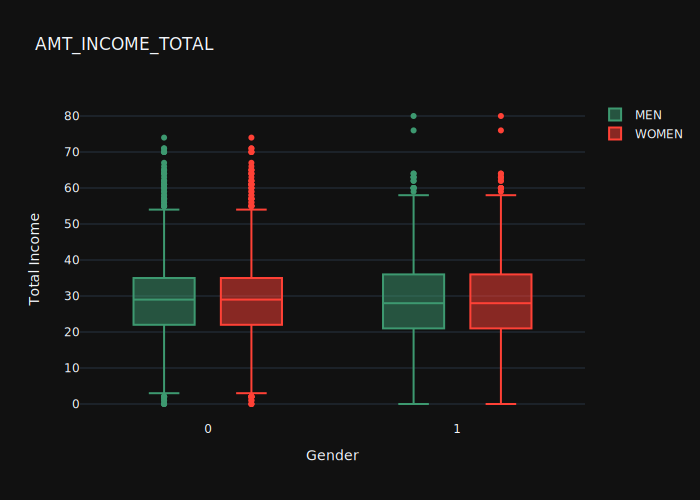

In [556]:
trace0 = go.Box(
    y=df_explo["Age"],
    x=df_explo["Survived"],
    name='MEN',
    marker=dict(color='#3D9970'))

trace1 = go.Box(
    y=df_explo['Age'],
    x=df_explo['Survived'],
    name='WOMEN',
    marker=dict(color='#FF4136'))
    
data = [trace0, trace1]

layout = go.Layout(yaxis=dict(title='Total Income',zeroline=False),
                   xaxis=dict(title='Gender'),title='AMT_INCOME_TOTAL',boxmode='group')
fig = go.Figure(data=data, layout=layout)

fig.update_layout(template='plotly_dark')

fig.show('svg')

***
***
# 5. Preprocessing

In [557]:
df_train3['Gender_Men'] = df_train3['Sex'].apply(lambda x: 1 if x=='male' else 0)
df_train3.drop(columns=['Sex'],inplace=True)
df_train3

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gender_Men
0,0,3,22,1,0,7.2500,S,Mr,1
1,1,1,38,1,0,71.2833,C,Mrs,0
2,1,3,26,0,0,7.9250,S,Miss,0
3,1,1,35,1,0,53.1000,S,Mrs,0
4,0,3,35,0,0,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,S,Rev,1
887,1,1,19,0,0,30.0000,S,Miss,0
888,0,3,22,1,2,23.4500,S,Miss,0
889,1,1,26,0,0,30.0000,C,Mr,1


In [558]:
df_test2['Gender_Men'] = df_test2['Sex'].apply(lambda x: 1 if x=='male' else 0)
df_test2.drop(columns=['Sex'],inplace=True)
df_test2

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived,Title,Gender_Men
0,3,34,0,0,7.8292,Q,0,Mr,1
1,3,47,1,0,7.0000,S,1,Mrs,0
2,2,62,0,0,9.6875,Q,0,Mr,1
3,3,27,0,0,8.6625,S,0,Mr,1
4,3,22,1,1,12.2875,S,1,Mrs,0
...,...,...,...,...,...,...,...,...,...
413,3,29,0,0,8.0500,S,0,Mr,1
414,1,39,0,0,108.9000,C,1,Dona,0
415,3,38,0,0,7.2500,S,0,Mr,1
416,3,29,0,0,8.0500,S,0,Mr,1


In [559]:
df_train3.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
Gender_Men    0
dtype: int64

In [560]:
df_test2.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Survived      0
Title         0
Gender_Men    0
dtype: int64

In [561]:
A = set(df_train3['Title'])
A

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [562]:
B = set(df_test2['Title'])
B

{'Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'}

In [563]:
B.difference(A)

{'Dona'}

In [564]:
df_test3 = df_test2.drop(df_test2[df_test2['Title'] == 'Dona'].index)
df_test3.reset_index(drop=True,inplace=True)

In [565]:
# Importamos la biblioteca sklearn
from sklearn.preprocessing import OrdinalEncoder

# Creamos un objeto OrdinalEncoder()
encoder = OrdinalEncoder()

# Asignamos los valores numéricos a las categorías
df_train3["Title Ordinal"] = encoder.fit_transform(df_train3["Title"].values.reshape(-1, 1))

df_test3["Title Ordinal"] = encoder.transform(df_test3["Title"].values.reshape(-1, 1))

In [566]:
df_train3.drop(columns=['Title'],inplace=True)
df_test3.drop(columns=['Title'],inplace=True)

In [567]:
df_test3 = pd.get_dummies(df_test3, columns=['Embarked'],drop_first=True)
df_test3

,Pclass,Age,SibSp,Parch,Fare,Survived,Gender_Men,Title Ordinal,Embarked_Q,Embarked_S
0,3,34,0,0,7.8292,0,1,11.0,1,0
1,3,47,1,0,7.0000,1,0,12.0,0,1
2,2,62,0,0,9.6875,0,1,11.0,1,0
3,3,27,0,0,8.6625,0,1,11.0,0,1
4,3,22,1,1,12.2875,1,0,12.0,0,1
...,...,...,...,...,...,...,...,...,...,...
412,3,28,0,0,7.7750,1,0,8.0,0,1
413,3,29,0,0,8.0500,0,1,11.0,0,1
414,3,38,0,0,7.2500,0,1,11.0,0,1
415,3,29,0,0,8.0500,0,1,11.0,0,1


In [568]:
df_train3 = pd.get_dummies(df_train3, columns=['Embarked'],drop_first=True)
df_train3

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_Men,Title Ordinal,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,1,11.0,0,1
1,1,1,38,1,0,71.2833,0,12.0,0,0
2,1,3,26,0,0,7.9250,0,8.0,0,1
3,1,1,35,1,0,53.1000,0,12.0,0,1
4,0,3,35,0,0,8.0500,1,11.0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,1,14.0,0,1
887,1,1,19,0,0,30.0000,0,8.0,0,1
888,0,3,22,1,2,23.4500,0,8.0,0,1
889,1,1,26,0,0,30.0000,1,11.0,0,0


In [580]:
X_train,y_train = df_train3.drop(columns=['Survived']),df_train3['Survived']

In [581]:
X_test,y_test = df_test3.drop(columns=['Survived']),df_test3['Survived']

In [582]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns = ['Fare','Age','SibSp','Parch']

X_train[columns] = scaler.fit_transform(X_train[columns])
X_train

,Pclass,Age,SibSp,Parch,Fare,Gender_Men,Title Ordinal,Embarked_Q,Embarked_S
0,3,0.2750,0.125,0.000000,0.014151,1,11.0,0,1
1,1,0.4750,0.125,0.000000,0.139136,0,12.0,0,0
2,3,0.3250,0.000,0.000000,0.015469,0,8.0,0,1
3,1,0.4375,0.125,0.000000,0.103644,0,12.0,0,1
4,3,0.4375,0.000,0.000000,0.015713,1,11.0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0.3375,0.000,0.000000,0.025374,1,14.0,0,1
887,1,0.2375,0.000,0.000000,0.058556,0,8.0,0,1
888,3,0.2750,0.125,0.333333,0.045771,0,8.0,0,1
889,1,0.3250,0.000,0.000000,0.058556,1,11.0,0,0


In [583]:
X_test[columns] = scaler.transform(X_test[columns])
X_test

,Pclass,Age,SibSp,Parch,Fare,Gender_Men,Title Ordinal,Embarked_Q,Embarked_S
0,3,0.4250,0.000,0.000000,0.015282,1,11.0,1,0
1,3,0.5875,0.125,0.000000,0.013663,0,12.0,0,1
2,2,0.7750,0.000,0.000000,0.018909,1,11.0,1,0
3,3,0.3375,0.000,0.000000,0.016908,1,11.0,0,1
4,3,0.2750,0.125,0.166667,0.023984,0,12.0,0,1
...,...,...,...,...,...,...,...,...,...
412,3,0.3500,0.000,0.000000,0.015176,0,8.0,0,1
413,3,0.3625,0.000,0.000000,0.015713,1,11.0,0,1
414,3,0.4750,0.000,0.000000,0.014151,1,11.0,0,1
415,3,0.3625,0.000,0.000000,0.015713,1,11.0,0,1


***
***
# 6. Fuctions

In [584]:
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

%matplotlib inline
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

def plotly_auc_roc_curve(model,X,y):
    
    pred_y_proba = model.predict_proba(X)[:,1]
    fpr,tpr,thresholds = roc_curve(y,pred_y_proba)
    auc = roc_auc_score(y,pred_y_proba)
    
    trace0 = go.Scatter(x=fpr, y=tpr,name='ROC Curve',marker=dict(color='#3D9970'),mode='lines')
    trace1 = go.Scatter(x=[0,1], y=[0,1],name='Base',marker=dict(color='#FF4136'),mode='lines')
    
    data = [trace0,trace1]

    layout=go.Layout(
                    xaxis=dict(title='False Positive Rate'),
                    yaxis=dict(title='True Positive Rate'),
                    title='ROC Curve')


    fig = go.Figure(data=data,layout=layout)

    fig.update_layout(template='plotly_dark',legend_title_text='AUC:  ' + str((auc*100).round(3)) +'%', width=1000, height=600)
    
    fig.show('svg')
    
    pass



def plotly_precision_recall_curve(model,X,y):
    
    pred_y_proba = model.predict_proba(X)[:,1]
    precision,recall,thresholds = precision_recall_curve(y,pred_y_proba)
    
    trace0 = go.Scatter(x=precision, y=recall,name='ROC Curve',marker=dict(color='#1f77b4'),mode='lines')
    
    
    data = [trace0]

    layout=go.Layout(
                    xaxis=dict(title='Precision Score'),
                    yaxis=dict(title='Recall Score'),
                    title='Precision Recall Curve')


    fig = go.Figure(data=data,layout=layout)

    fig.update_layout(template='plotly_dark', width=1000, height=600)
    #fig.update_layout(legend_title_text='Trend')
    
    fig.show('svg')
    
    pass

def plotly_precision_recall_curve2(model,X,y):
    
    pred_y_proba = model.predict_proba(X)[:,1]
    precision,recall,thresholds = precision_recall_curve(y,pred_y_proba)
    
    f1_score= 2*((precision*recall)/(precision+recall))
    f1_score_max = f1_score.max()
            
    list_f1_score = list(f1_score)
    list_thresholds = list(thresholds)
            
    index_f1_score_max = list_f1_score.index(f1_score_max)
            
    f1_best_value = list_f1_score[index_f1_score_max]
    thresholds_best_value = list_thresholds[index_f1_score_max]
    
    
    #trace0 = go.Scatter(x=precision, y=recall,name='ROC Curve',marker=dict(color='#3D9970'),mode='lines')
    trace0 = go.Scatter(x=thresholds, y=precision,name='Precision',marker=dict(color='#FF4136'),mode='lines')
    trace1 = go.Scatter(x=thresholds, y=recall,name='Recall',marker=dict(color='#3D9970'),mode='lines')
    trace2 = go.Scatter(x=thresholds, y = f1_score, name='F1 score (Max value: '+ str((f1_best_value*100).round(2)) +'% & Threshold: '+ str((thresholds_best_value).round(2)) +')' ,
                        marker=dict(color='#1f77b4') , mode='lines' )
    
    data = [trace0,trace1,trace2]

    layout=go.Layout(
                    xaxis=dict(title='Threshold'),
               
                    title='Precision Recall Threshold')


    fig = go.Figure(data=data,layout=layout)

    fig.update_layout(template='plotly_dark',yaxis_range=[0,1],xaxis_range=[0,1], width=1000, height=600)
    
    
    fig.show('svg')
    
    pass

def new_threshold(model,threshold,X):
    
    import numpy as np
    
    y_pred = model.predict_proba(X)[:,1]
    
    list_new = []
    
    for y_value in y_pred:
        
        if y_value >= threshold:
            
            list_new.append(1)
            
        else:
            
            list_new.append(0)
            
    return np.array(list_new)

def plot_best_models2(models_list,str_model_name,X,y):
    
    colors_list=['#636EFA','#00CC96','#AB63FA','#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
    
    data = []
    
    for i in range(len(models_list)):
        
            pred_y_proba = models_list[i].predict_proba(X)[:,1]
            fpr,tpr,thresholds = roc_curve(y,pred_y_proba)
            auc = roc_auc_score(y,pred_y_proba)
            
            data.append(go.Scatter(x=fpr, y=tpr,name= str_model_name[i] +'; AUC:'+ str((auc*100).round(2)) +'%',marker=dict(color=colors_list[i]),mode='lines'))

    data.append(go.Scatter(x=[0,1], y=[0,1],name='Base',marker=dict(color='#FF4136'),mode='lines'))
            
    layout=go.Layout(
                    xaxis=dict(title='False Positive Rate'),
                    yaxis=dict(title='True Positive Rate'),
                    title='ROC Curves for different Models')
    
    fig = go.Figure(data=data,layout=layout)

    fig.update_layout(template='plotly_dark',legend_title_text='Different Algorithms', width=1100, height=800)
    
    fig.show('svg')
    
    
    data = []
    
    for i in range(len(models_list)):
        
            pred_y_proba = models_list[i].predict_proba(X)[:,1]
            precision,recall,thresholds = precision_recall_curve(y,pred_y_proba)
            auc = roc_auc_score(y,pred_y_proba)
            
            f1_score= 2*((precision*recall)/(precision+recall))
            f1_score_max = f1_score.max()
            
            list_f1_score = list(f1_score)
            list_thresholds = list(thresholds)
            
            index_f1_score_max = list_f1_score.index(f1_score_max)
            
            f1_best_value = list_f1_score[index_f1_score_max]
            thresholds_best_value = list_thresholds[index_f1_score_max]
            
            data.append(go.Scatter(x=thresholds, y = f1_score ,name= str_model_name[i] +'; Max F1 score: ' + str((f1_best_value*100).round(2))+'% and its Threshold: ' + str((thresholds_best_value).round(2))
                                   ,marker=dict(color=colors_list[i]),mode='lines'))
            
    layout=go.Layout(
                    xaxis=dict(title='Threshold'),
                    yaxis=dict(title='F1 Score Rate'),
                    title='F1 Score / Threshold for Different Models')
    
    fig = go.Figure(data=data,layout=layout)

    fig.update_layout(template='plotly_dark',legend_title_text='Different Algorithms', width=1100, height=800)
    
    fig.show('svg')
    

***
***
# 7. Algorithms

## KNeighbors Classifier

Training score 0.8462401795735129 
 
Testing score 0.86810551558753 
 
Confusion Matrix of Validation Set: 
 
 [[248  18]
 [ 37 114]] 

Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       266
           1       0.86      0.75      0.81       151

    accuracy                           0.87       417
   macro avg       0.87      0.84      0.85       417
weighted avg       0.87      0.87      0.87       417


 The Process time taken by the model was 0.0 minutes

 The Real time taken by the model was 0.0 minutes


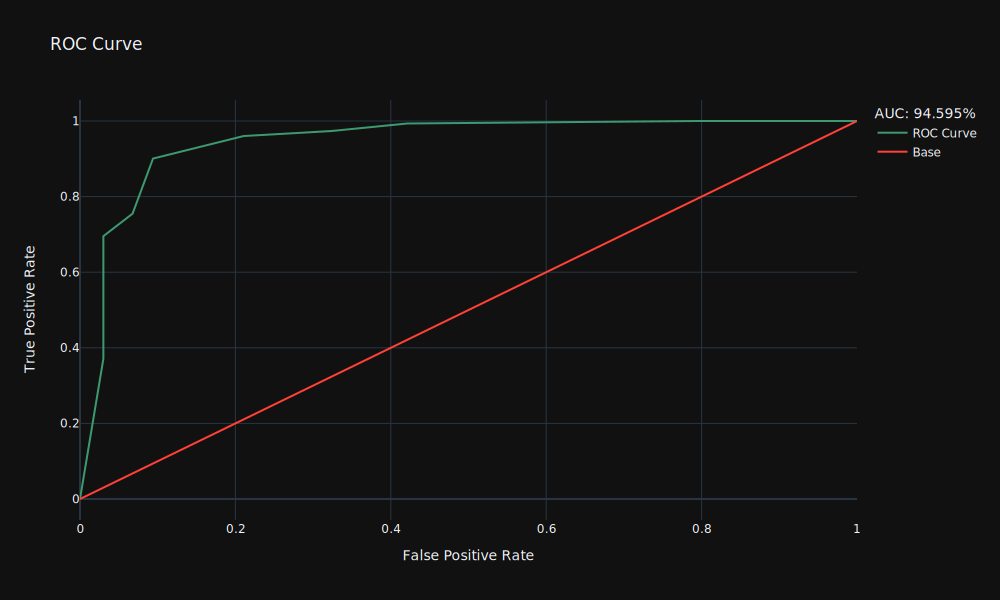

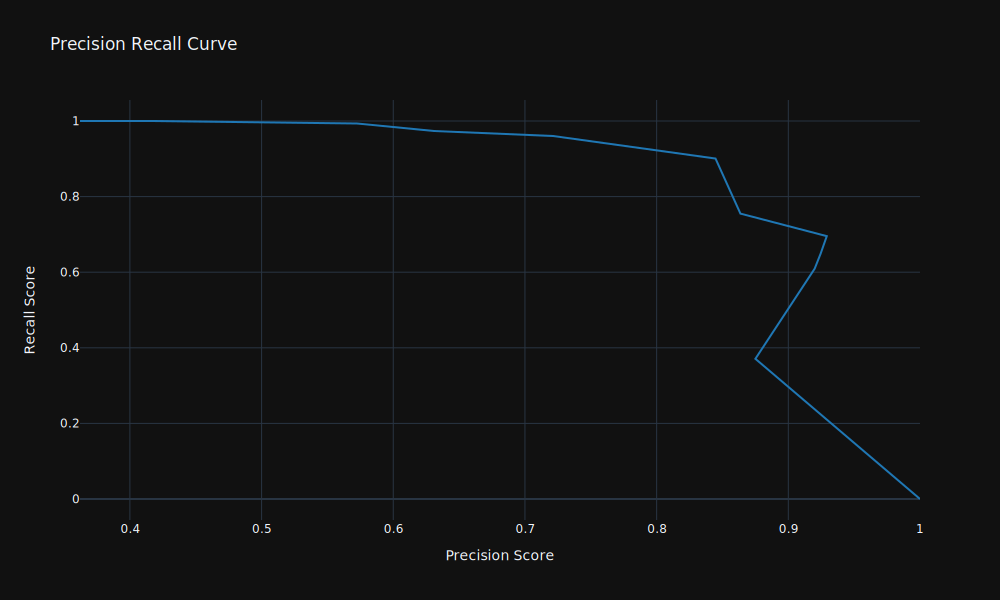

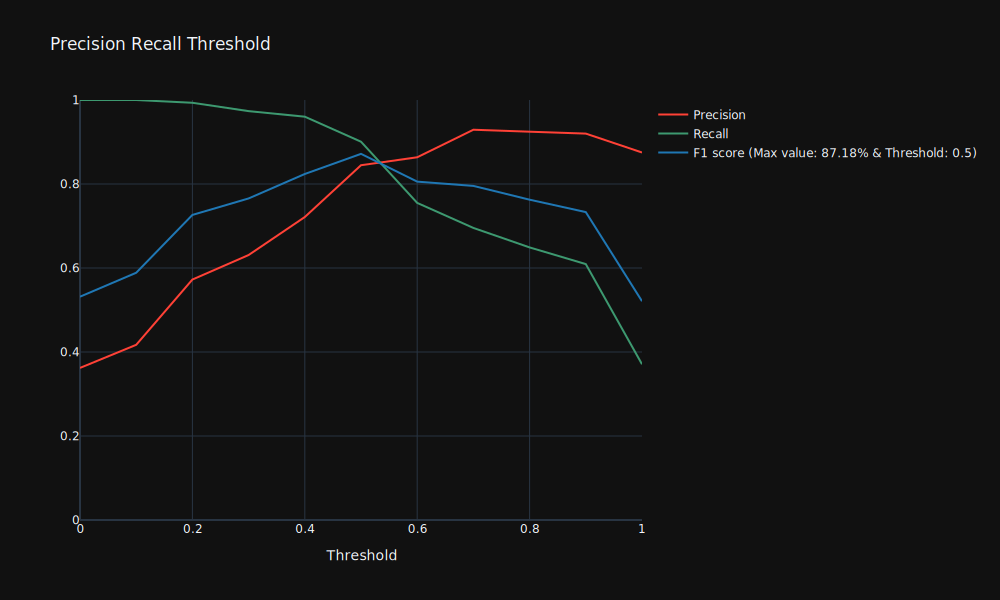

In [593]:
start = time.process_time()
real_time = dt.now()

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

pred_val = knn.predict(X_test)

print(f"Training score {knn.score(X_train,y_train)} \n ")
print(f"Testing score {knn.score(X_test,y_test)} \n ")

print(f"Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_test,pred_val)} \n")
print(f"Classification Report of Validation Set: \n \n {classification_report(y_test,pred_val)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(knn,X_test,y_test)

plotly_precision_recall_curve(knn,X_test,y_test)

plotly_precision_recall_curve2(knn,X_test,y_test)

In [594]:
start = time.process_time()
real_time = dt.now()

model=KNeighborsClassifier()

param_grid={   'n_neighbors':[5,8,10,12,14],'weights':['uniform','distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']  }

skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

grid_search = GridSearchCV(model, param_grid,cv=skf, scoring="f1_macro")

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

{'algorithm': 'auto', 'n_neighbors': 14, 'weights': 'uniform'}

 The Process time taken by the model was 0.07 minutes

 The Real time taken by the model was 0.02 minutes


Training score 0.8294051627384961 
 
Testing score 0.894484412470024 
 
Confusion Matrix of Testing Set: 
 
 [[256  10]
 [ 34 117]] 

Classification Report of Testing Set: 
 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       266
           1       0.92      0.77      0.84       151

    accuracy                           0.89       417
   macro avg       0.90      0.87      0.88       417
weighted avg       0.90      0.89      0.89       417


 The Process time taken by the model was 0.01 minutes

 The Real time taken by the model was 0.0 minutes


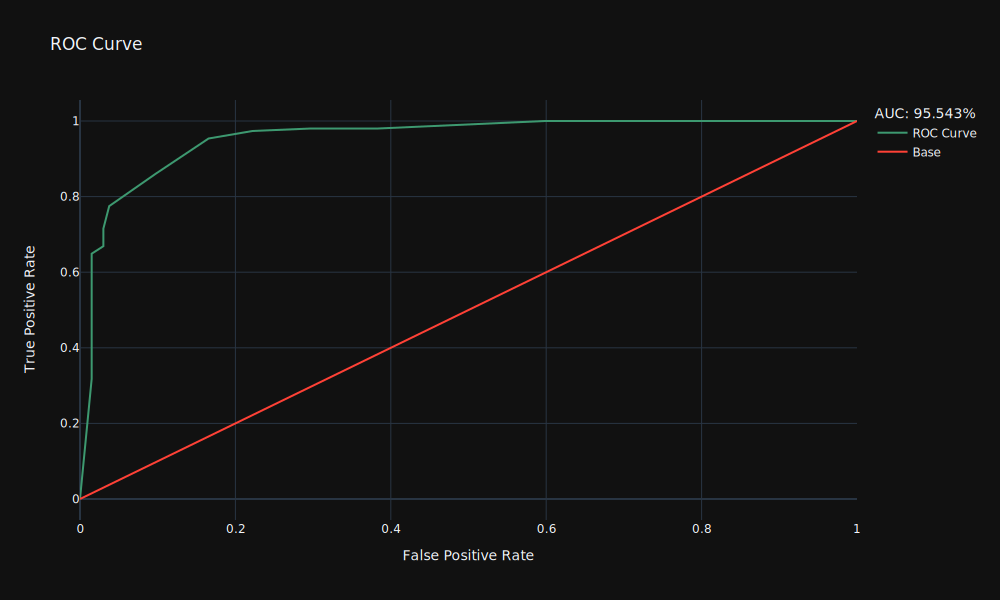

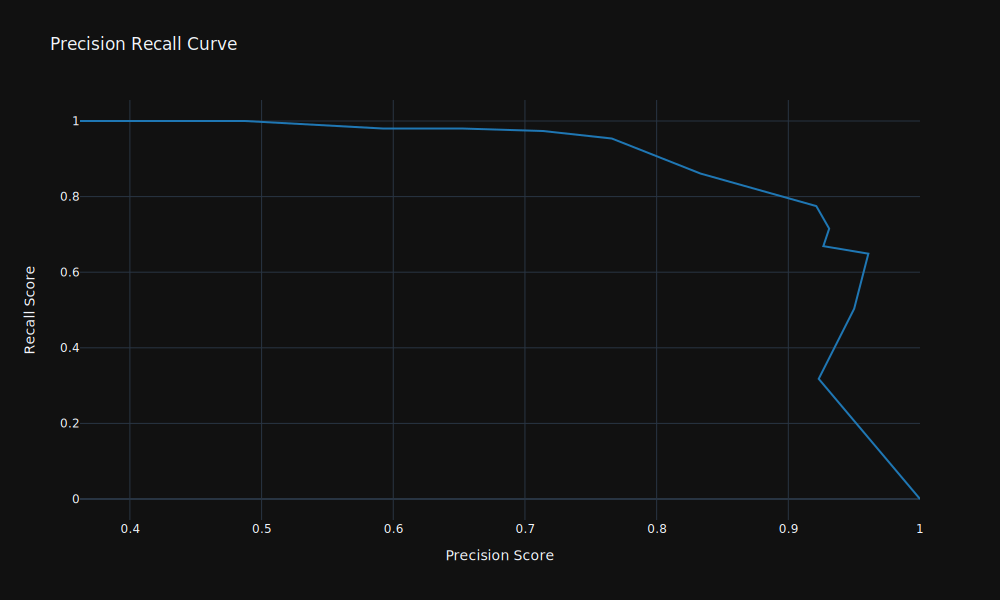

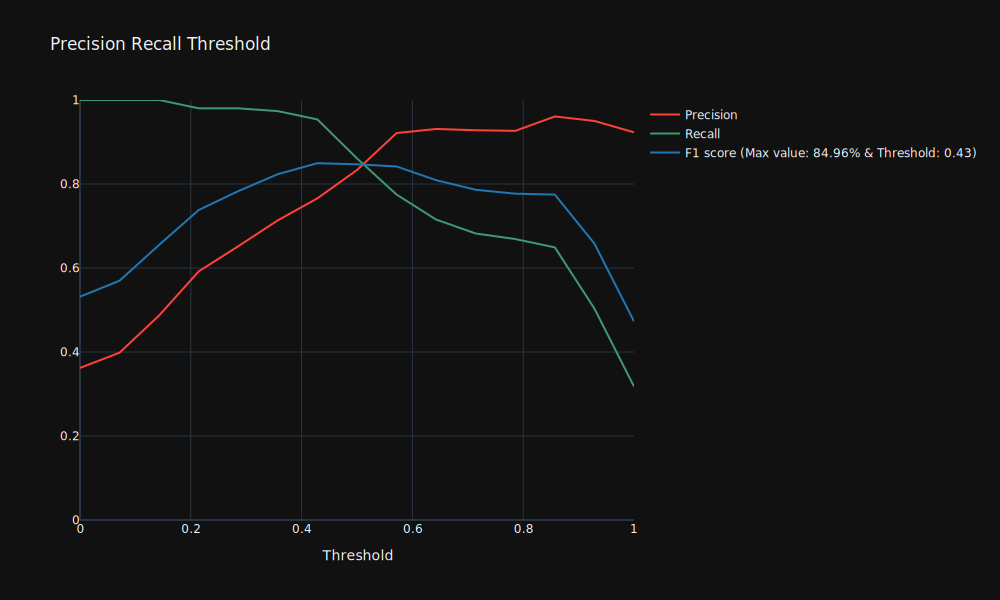

In [595]:
start = time.process_time()
real_time = dt.now()

best_knn = KNeighborsClassifier(**grid_search.best_params_)
best_knn.fit(X_train,y_train)

pred_val = best_knn.predict(X_test)

print(f"Training score {best_knn.score(X_train,y_train)} \n ")
print(f"Testing score {best_knn.score(X_test,y_test)} \n ")

print(f"Confusion Matrix of Testing Set: \n \n {confusion_matrix(y_test,pred_val)} \n")
print(f"Classification Report of Testing Set: \n \n {classification_report(y_test,pred_val)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(best_knn,X_test,y_test)

plotly_precision_recall_curve(best_knn,X_test,y_test)

plotly_precision_recall_curve2(best_knn,X_test,y_test)

***
## Logistic Regression

Training score 0.8035914702581369 
 
Testing score 0.935251798561151 
 
Confusion Matrix of Validation Set: 
 
 [[251  15]
 [ 12 139]] 

Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       266
           1       0.90      0.92      0.91       151

    accuracy                           0.94       417
   macro avg       0.93      0.93      0.93       417
weighted avg       0.94      0.94      0.94       417


 The Process time taken by the model was 0.0 minutes

 The Real time taken by the model was 0.0 minutes


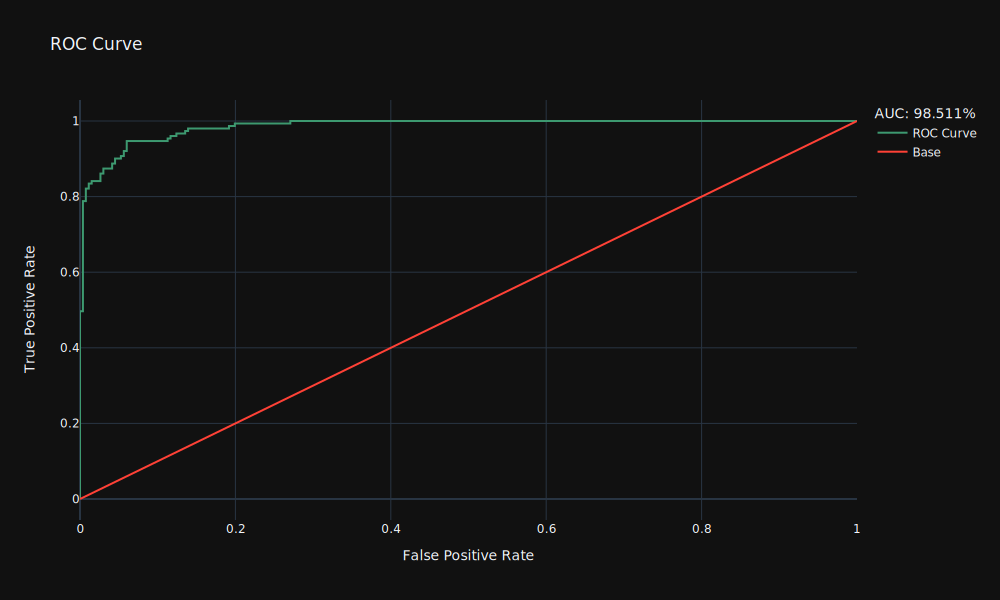

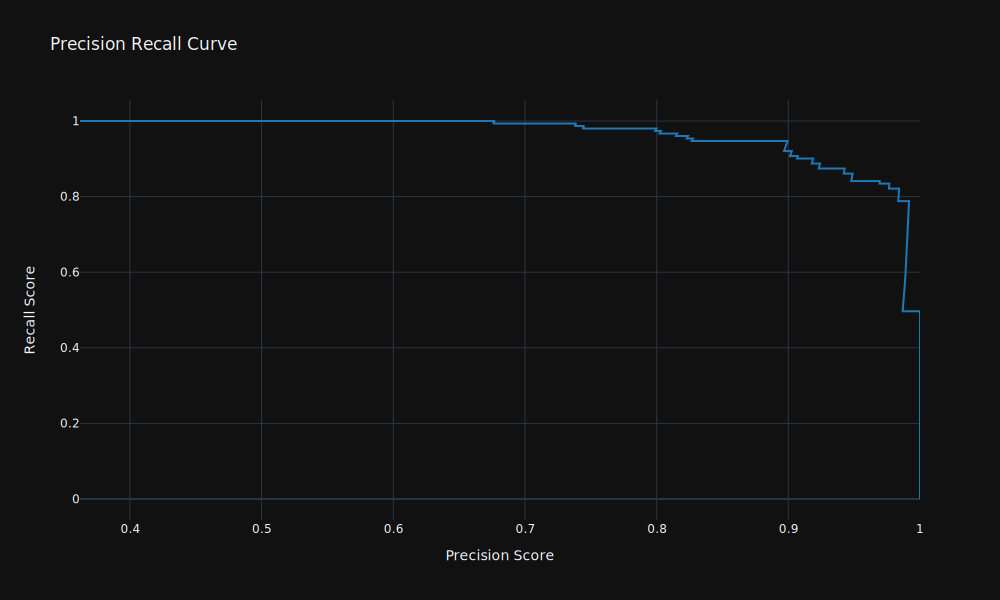

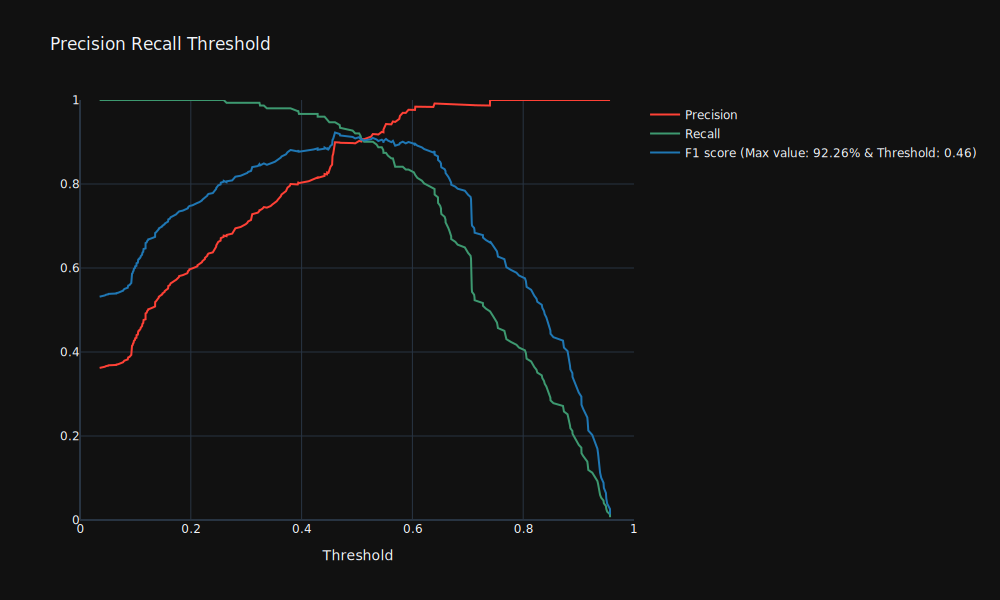

In [588]:
start = time.process_time()
real_time = dt.now()

from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=100,max_iter=1000)
log.fit(X_train,y_train)


pred_val = log.predict(X_test)

print(f"Training score {log.score(X_train,y_train)} \n ")
print(f"Testing score {log.score(X_test,y_test)} \n ")

print(f"Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_test,pred_val)} \n")
print(f"Classification Report of Validation Set: \n \n {classification_report(y_test,pred_val)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(log,X_test,y_test)

plotly_precision_recall_curve(log,X_test,y_test)

plotly_precision_recall_curve2(log,X_test,y_test)

In [589]:
start = time.process_time()
real_time = dt.now()

model=LogisticRegression()

param_grid={   'max_iter':[1000,1500,3000,5000],'penalty':['l2','l1'], 'C': np.logspace(-4,4,20),'solver': ['lbfgs','netwon-cg','liblinear','sag','saga']  }

skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

grid_search = GridSearchCV(model, param_grid,cv=skf, scoring="f1_macro")

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

{'C': 0.08858667904100823, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

 The Process time taken by the model was 2.58 minutes

 The Real time taken by the model was 0.67 minutes


Training score 0.8103254769921436 
 
Testing score 0.9400479616306955 
 
Confusion Matrix of Testing Set: 
 
 [[266   0]
 [ 25 126]] 

Classification Report of Testing Set: 
 
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       266
           1       1.00      0.83      0.91       151

    accuracy                           0.94       417
   macro avg       0.96      0.92      0.93       417
weighted avg       0.95      0.94      0.94       417


 The Process time taken by the model was 0.0 minutes

 The Real time taken by the model was 0.0 minutes


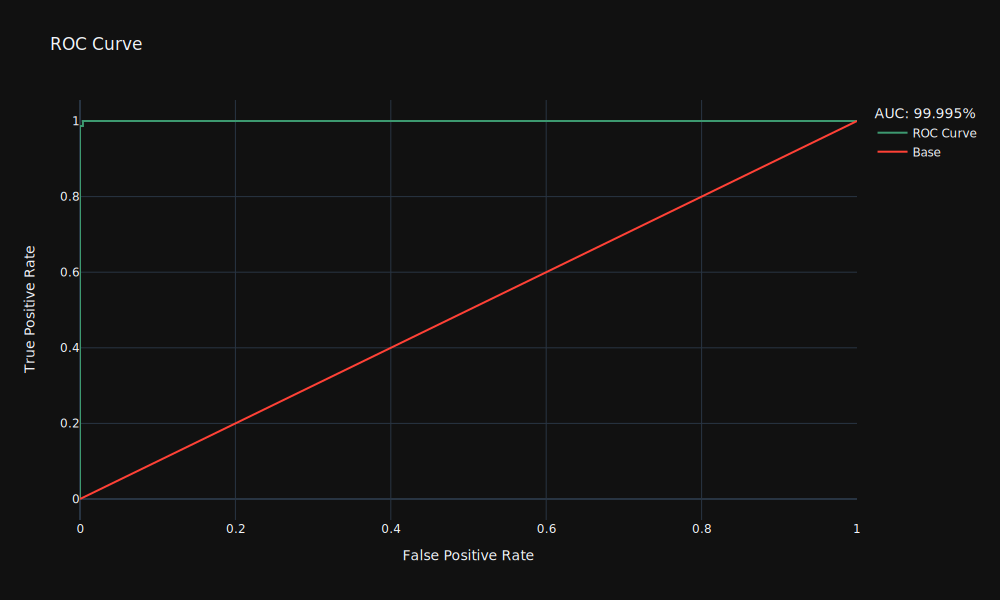

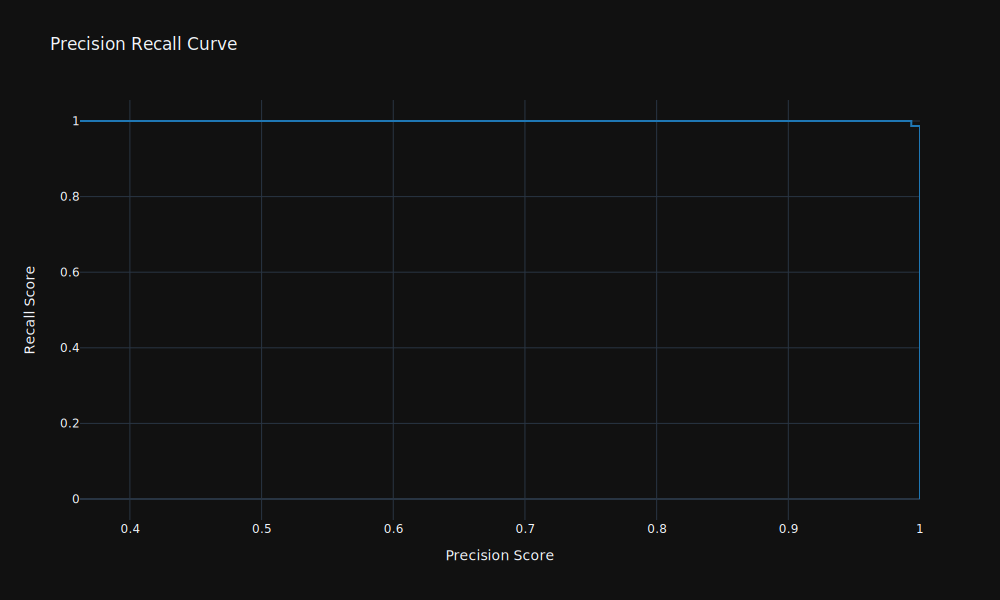

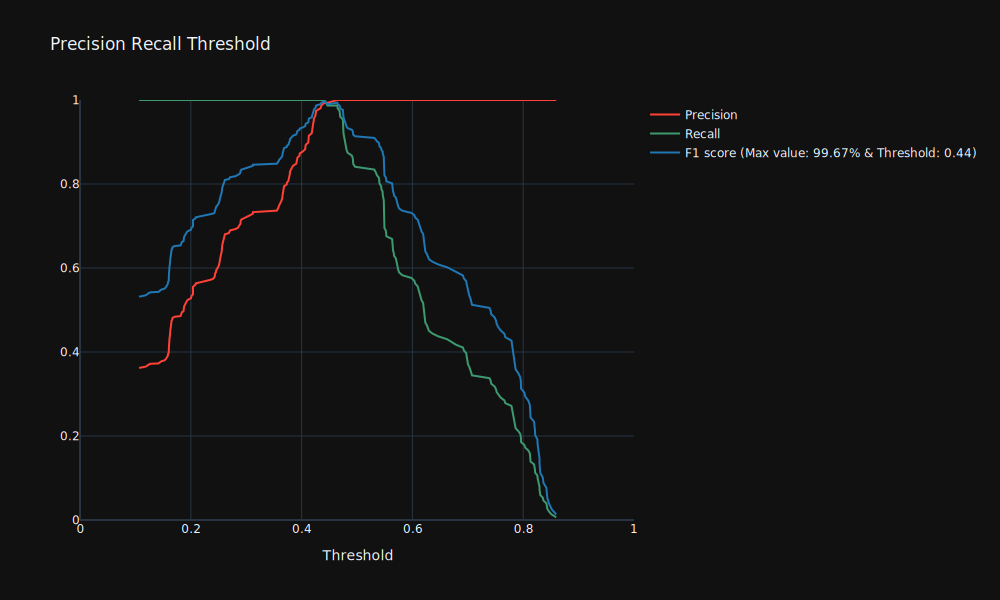

In [590]:
start = time.process_time()
real_time = dt.now()

best_log = LogisticRegression(**grid_search.best_params_)
best_log.fit(X_train,y_train)

pred_val = best_log.predict(X_test)

print(f"Training score {best_log.score(X_train,y_train)} \n ")
print(f"Testing score {best_log.score(X_test,y_test)} \n ")

print(f"Confusion Matrix of Testing Set: \n \n {confusion_matrix(y_test,pred_val)} \n")
print(f"Classification Report of Testing Set: \n \n {classification_report(y_test,pred_val)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(best_log,X_test,y_test)

plotly_precision_recall_curve(best_log,X_test,y_test)

plotly_precision_recall_curve2(best_log,X_test,y_test)

In [591]:
pred_val = best_log.predict(X_test)

pred_new = new_threshold(best_log,0.44,X_test)

print(f"Previous Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_test,pred_val)} \n")

print(f"New Confusion Matrix of Validation Set: \n \n {confusion_matrix(y_test,pred_new)} \n")

print(f"Previous Classification Report of Validation Set: \n \n {classification_report(y_test,pred_val)}")

print(f"New Classification Report of Validation Set: \n \n {classification_report(y_test,pred_new)}")

Previous Confusion Matrix of Validation Set: 
 
 [[266   0]
 [ 25 126]] 

New Confusion Matrix of Validation Set: 
 
 [[265   1]
 [  0 151]] 

Previous Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       266
           1       1.00      0.83      0.91       151

    accuracy                           0.94       417
   macro avg       0.96      0.92      0.93       417
weighted avg       0.95      0.94      0.94       417

New Classification Report of Validation Set: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       0.99      1.00      1.00       151

    accuracy                           1.00       417
   macro avg       1.00      1.00      1.00       417
weighted avg       1.00      1.00      1.00       417



## Random Forest Classifier

Training score 0.9797979797979798 
 
Testing score 0.8273381294964028 
 
Confusion Matrix of Testing Set: 
 
 [[227  39]
 [ 33 118]] 

Classification Report of Testing Set: 
 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       266
           1       0.75      0.78      0.77       151

    accuracy                           0.83       417
   macro avg       0.81      0.82      0.81       417
weighted avg       0.83      0.83      0.83       417


 The Process time taken by the model was 0.0 minutes

 The Real time taken by the model was 0.0 minutes


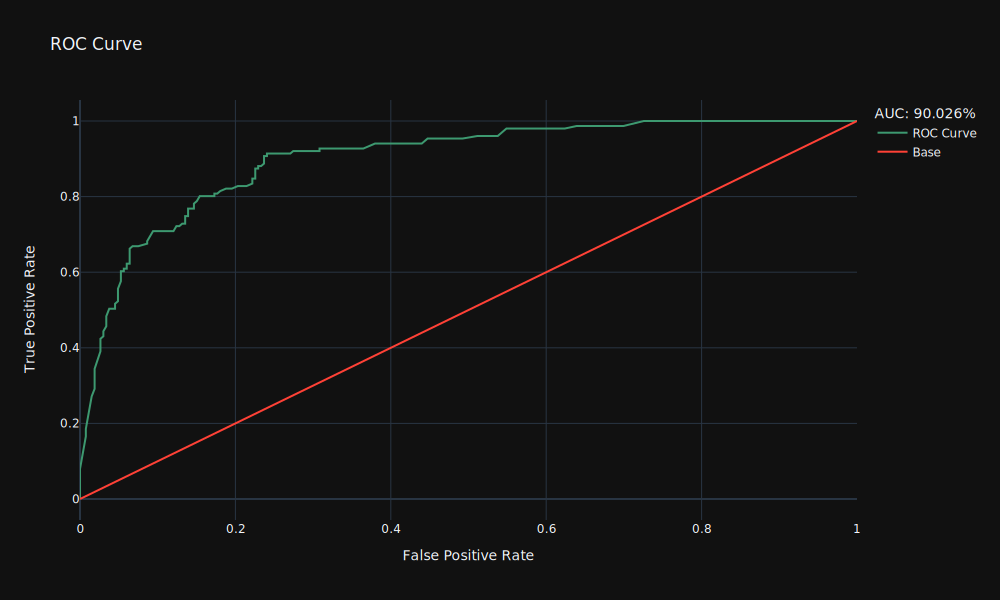

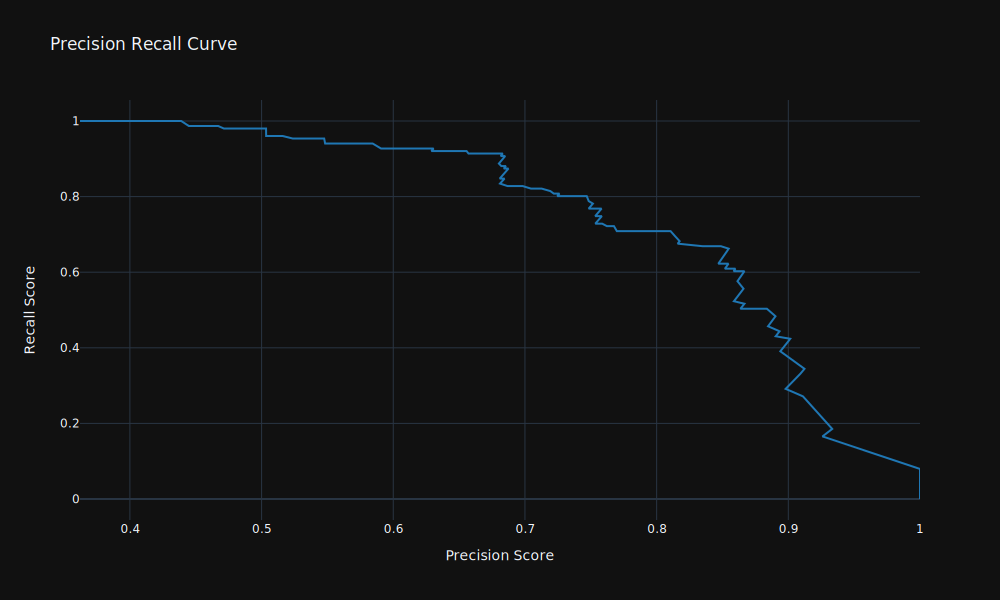

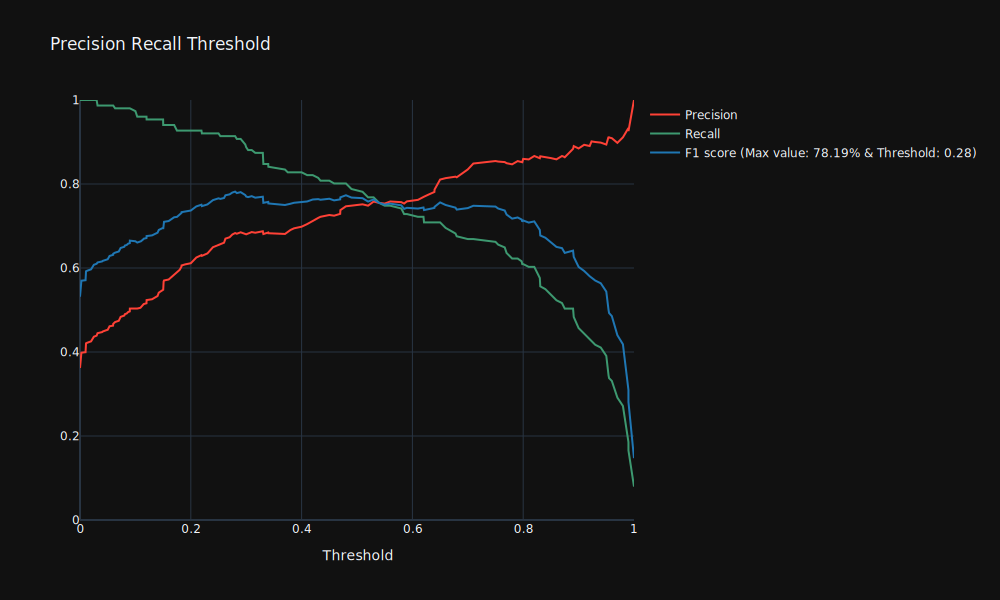

In [592]:
start = time.process_time()

real_time = dt.now()

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=100,n_estimators=100)
rfc.fit(X_train,y_train)

pred_val = rfc.predict(X_test)

print(f"Training score {rfc.score(X_train,y_train)} \n ")
print(f"Testing score {rfc.score(X_test,y_test)} \n ")

print(f"Confusion Matrix of Testing Set: \n \n {confusion_matrix(y_test,pred_val)} \n")
print(f"Classification Report of Testing Set: \n \n {classification_report(y_test,pred_val)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(rfc,X_test,y_test)

plotly_precision_recall_curve(rfc,X_test,y_test)

plotly_precision_recall_curve2(rfc,X_test,y_test)

In [480]:
start = time.process_time()
real_time = dt.now()

model=RandomForestClassifier()

param_grid={    'n_estimators' : [100,125,150,175,200],
                'max_depth':[1,2,3,4,5,6],
                'random_state':[100],
                 'max_features':['sqrt','log2'],
                'class_weight':['balanced'] }

skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

grid_search = GridSearchCV(model, param_grid,cv=skf, scoring="f1_macro")

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

{'class_weight': 'balanced', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 100}

 The Process time taken by the model was 0.65 minutes

 The Real time taken by the model was 0.65 minutes


Training score 0.8821548821548821 
 
Testing score 0.9064748201438849 
 
Confusion Matrix of Testing Set: 
 
 [[237  29]
 [ 10 141]] 

Classification Report of Testing Set: 
 
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       266
           1       0.83      0.93      0.88       151

    accuracy                           0.91       417
   macro avg       0.89      0.91      0.90       417
weighted avg       0.91      0.91      0.91       417


 The Process time taken by the model was 0.0 minutes

 The Real time taken by the model was 0.0 minutes


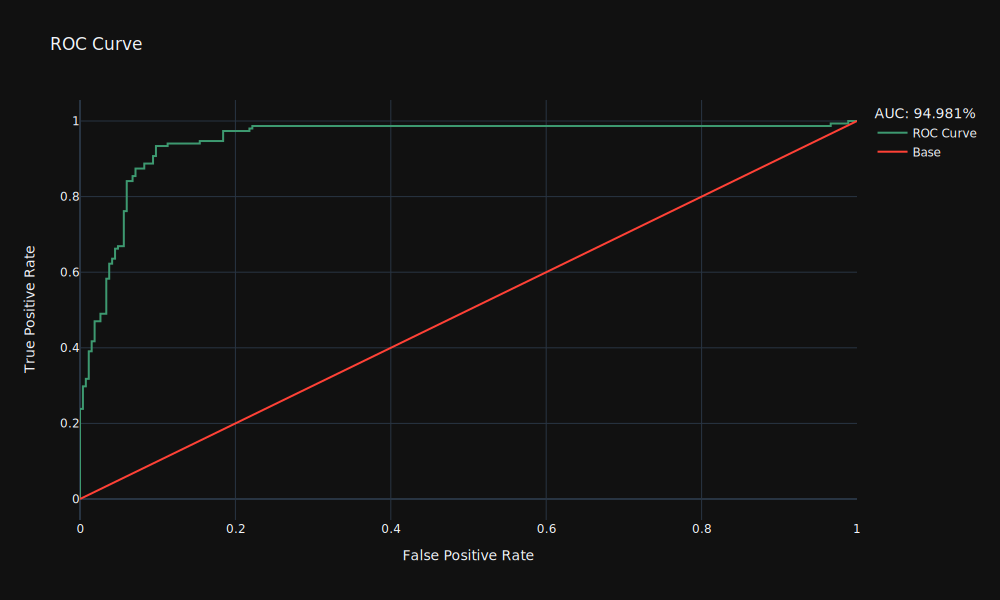

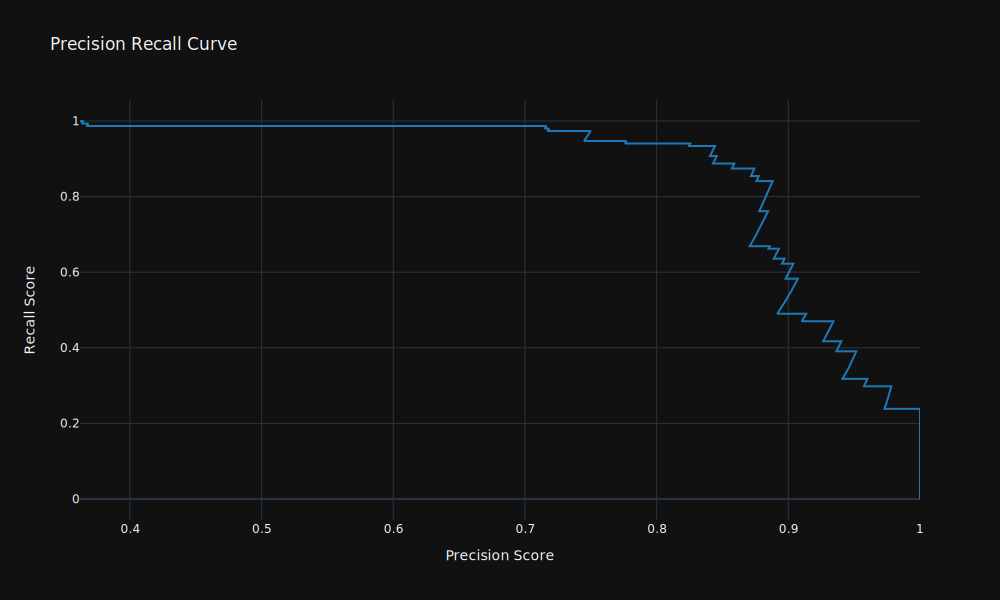

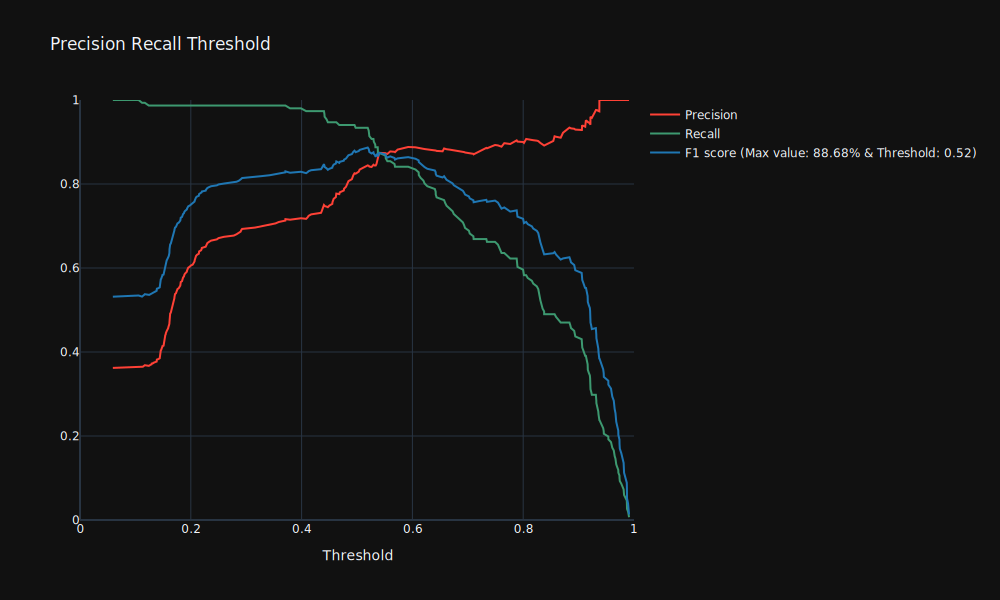

In [481]:
start = time.process_time()
real_time = dt.now()

best_forest = RandomForestClassifier(**grid_search.best_params_)
best_forest.fit(X_train,y_train)

pred_val = best_forest.predict(X_test)

print(f"Training score {best_forest.score(X_train,y_train)} \n ")
print(f"Testing score {best_forest.score(X_test,y_test)} \n ")

print(f"Confusion Matrix of Testing Set: \n \n {confusion_matrix(y_test,pred_val)} \n")
print(f"Classification Report of Testing Set: \n \n {classification_report(y_test,pred_val)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(best_forest,X_test,y_test)

plotly_precision_recall_curve(best_forest,X_test,y_test)

plotly_precision_recall_curve2(best_forest,X_test,y_test)

In [482]:
for i,item in enumerate(best_forest.feature_importances_):
    print(" {0:s} : {1:.2f}".format(X_test.columns[i],item))

 Pclass : 0.13
 Age : 0.11
 SibSp : 0.06
 Parch : 0.03
 Fare : 0.16
 Gender_Men : 0.35
 Title Ordinal : 0.15
 Embarked_Q : 0.01
 Embarked_S : 0.02


***
## XGBoost Classifier

Training score 0.9618406285072951 
 
Testing score 0.8249400479616307 
 
Confusion Matrix of Testing Set: 
 
 [[228  38]
 [ 35 116]] 

Classification Report of Testing Set: 
 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       266
           1       0.75      0.77      0.76       151

    accuracy                           0.82       417
   macro avg       0.81      0.81      0.81       417
weighted avg       0.83      0.82      0.83       417


 The Process time taken by the model was 0.01 minutes

 The Real time taken by the model was 0.0 minutes


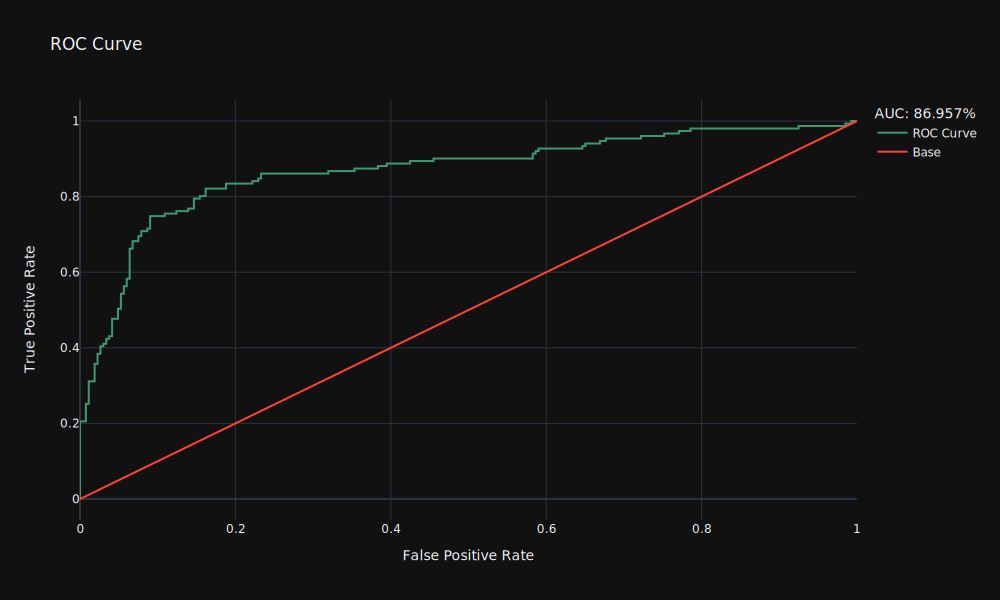

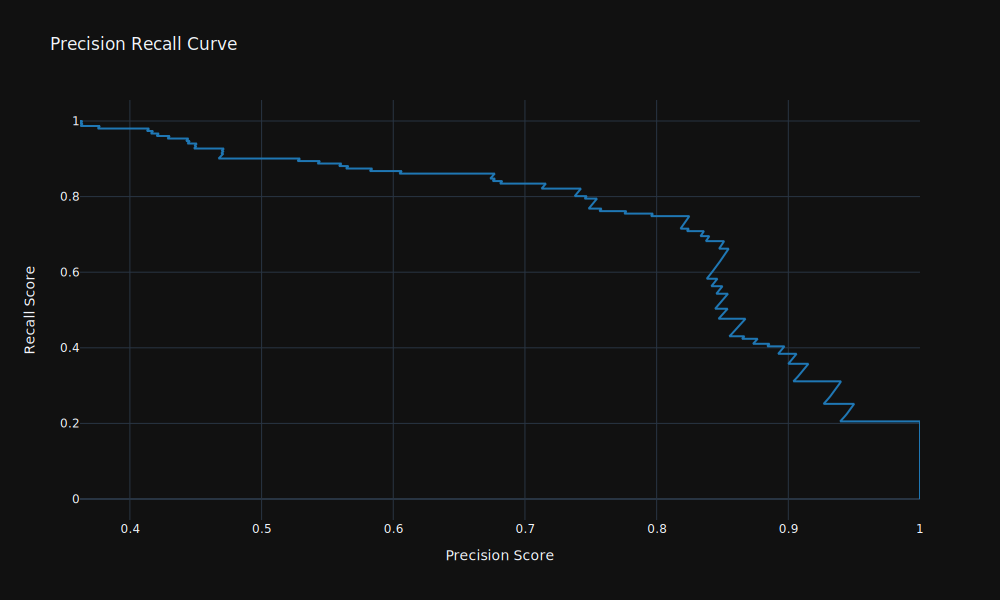

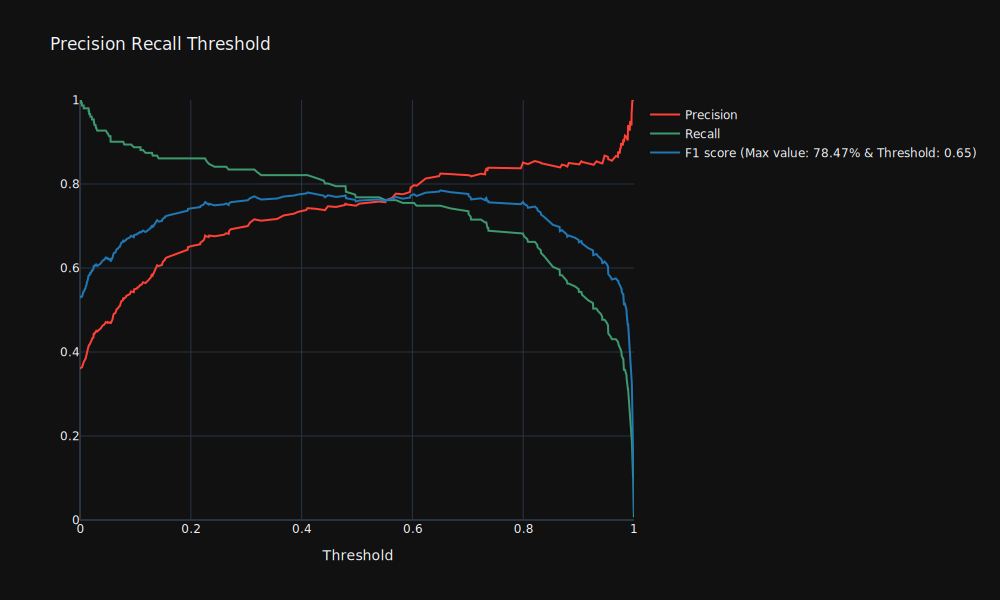

In [483]:
start = time.process_time()
real_time = dt.now()

from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=100)
xgb.fit(X_train,y_train)

pred_val = xgb.predict(X_test)

print(f"Training score {xgb.score(X_train,y_train)} \n ")
print(f"Testing score {xgb.score(X_test,y_test)} \n ")

print(f"Confusion Matrix of Testing Set: \n \n {confusion_matrix(y_test,pred_val)} \n")
print(f"Classification Report of Testing Set: \n \n {classification_report(y_test,pred_val)}")


print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(xgb,X_test,y_test)

plotly_precision_recall_curve(xgb,X_test,y_test)

plotly_precision_recall_curve2(xgb,X_test,y_test)

In [484]:
start = time.process_time()
real_time = dt.now()

model=XGBClassifier()

param_grid={    'learning_rate' : [0.05,0.1,0.15,0.2,0.25,0.3],
                                    'max_depth':[2,3,4,5],
                                    'min_child_weight':[1,3,5,7]} 
           
skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

grid_search = GridSearchCV(model, param_grid,cv=skf, scoring="f1_macro")
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

{'learning_rate': 0.15, 'max_depth': 5, 'min_child_weight': 5}

 The Process time taken by the model was 1.99 minutes

 The Real time taken by the model was 0.27 minutes


Training score 0.9023569023569024 
 
Testing score 0.8585131894484412 
 
Confusion Matrix of Testing Set: 
 
 [[239  27]
 [ 32 119]] 

Classification Report of Testing Set: 
 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       266
           1       0.82      0.79      0.80       151

    accuracy                           0.86       417
   macro avg       0.85      0.84      0.85       417
weighted avg       0.86      0.86      0.86       417


 The Process time taken by the model was 0.01 minutes

 The Real time taken by the model was 0.0 minutes


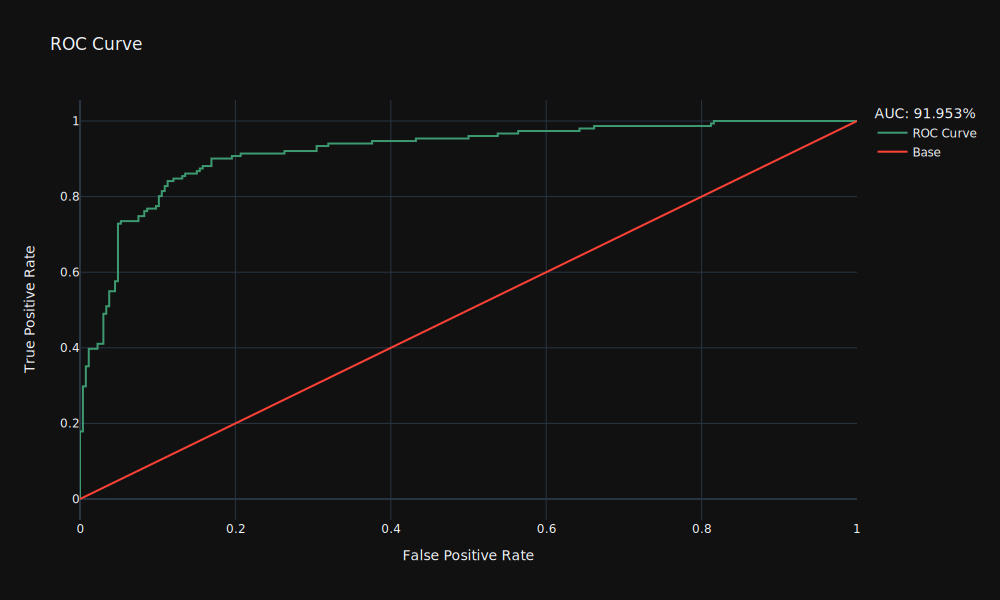

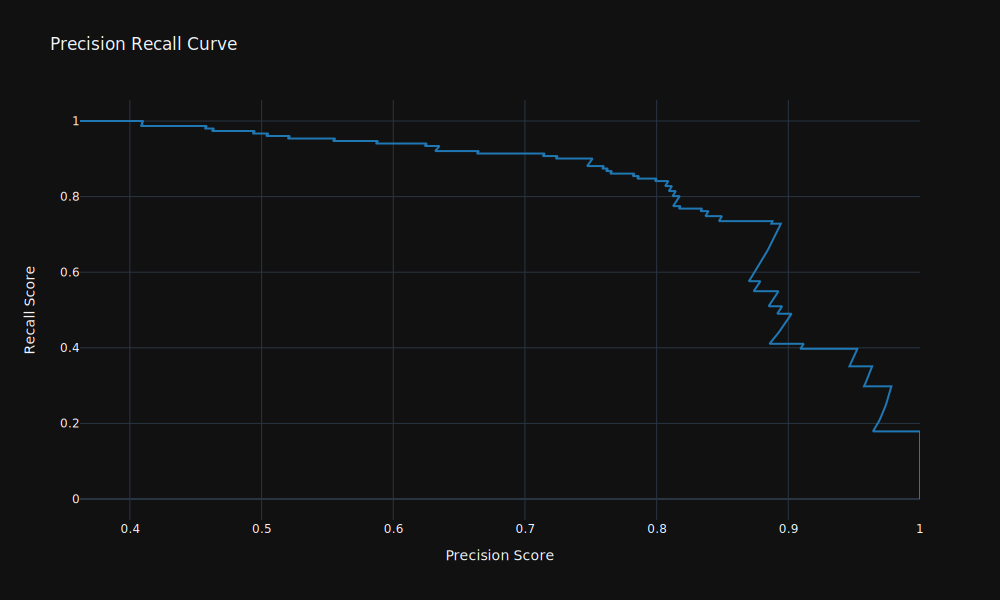

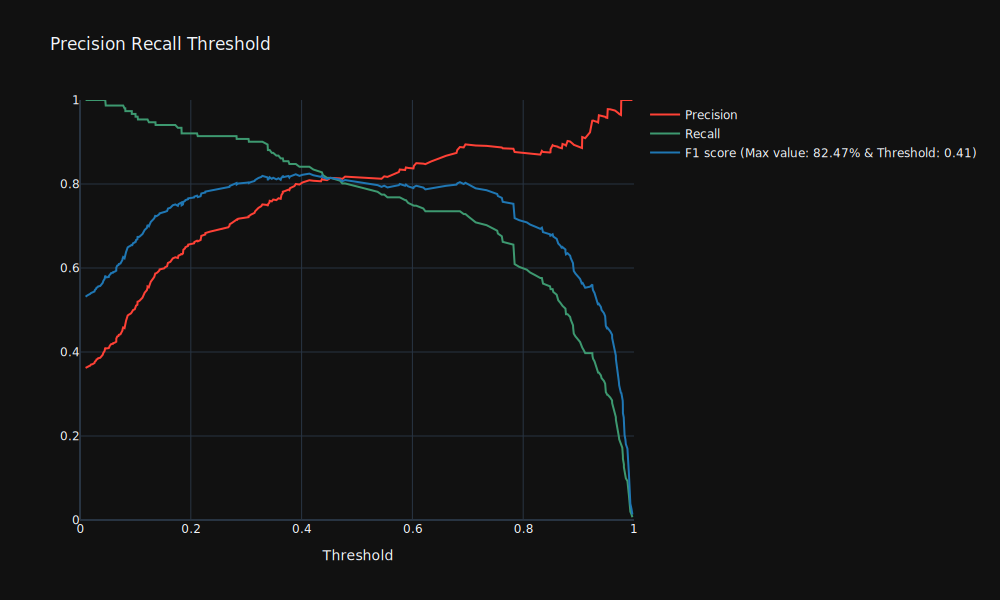

In [485]:
start = time.process_time()
real_time = dt.now()

best_xgb = XGBClassifier(**grid_search.best_params_)
best_xgb.fit(X_train,y_train)

pred_val = best_xgb.predict(X_test)

print(f"Training score {best_xgb.score(X_train,y_train)} \n ")
print(f"Testing score {best_xgb.score(X_test,y_test)} \n ")

print(f"Confusion Matrix of Testing Set: \n \n {confusion_matrix(y_test,pred_val)} \n")
print(f"Classification Report of Testing Set: \n \n {classification_report(y_test,pred_val)}")

print('\n The Process time taken by the model was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken by the model was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

plotly_auc_roc_curve(best_xgb,X_test,y_test)

plotly_precision_recall_curve(best_xgb,X_test,y_test)

plotly_precision_recall_curve2(best_xgb,X_test,y_test)

***
***
# 8. Conclussions

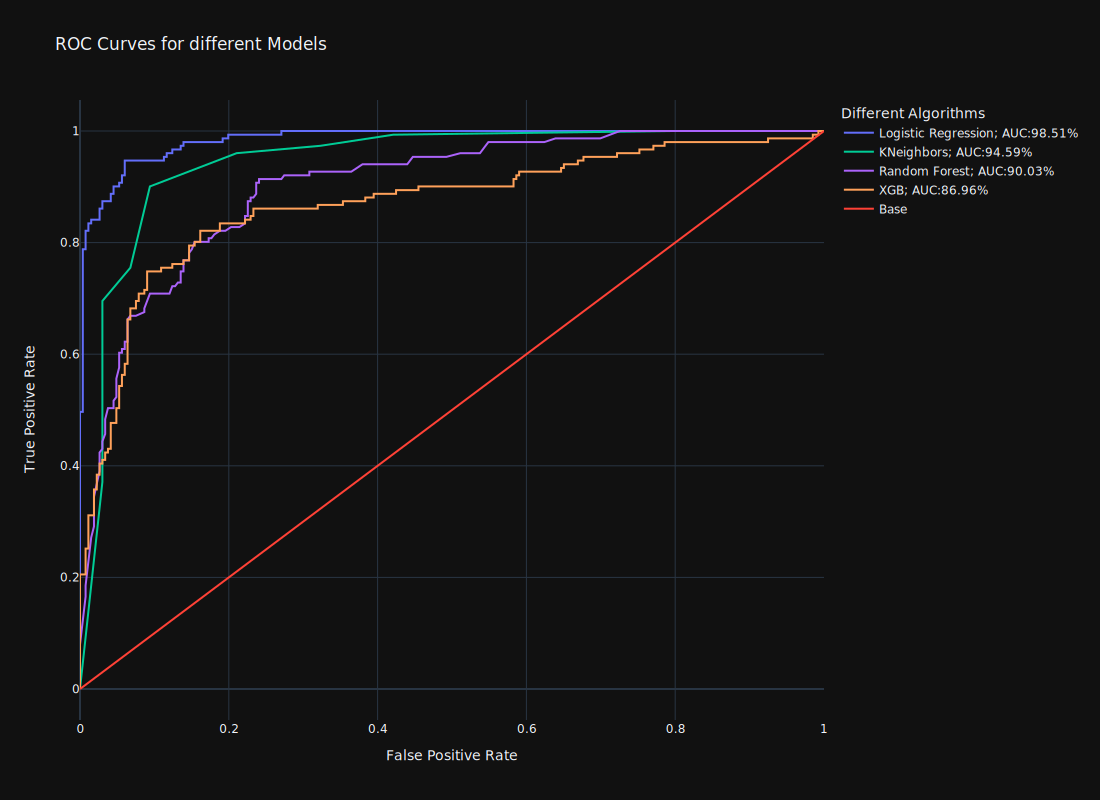

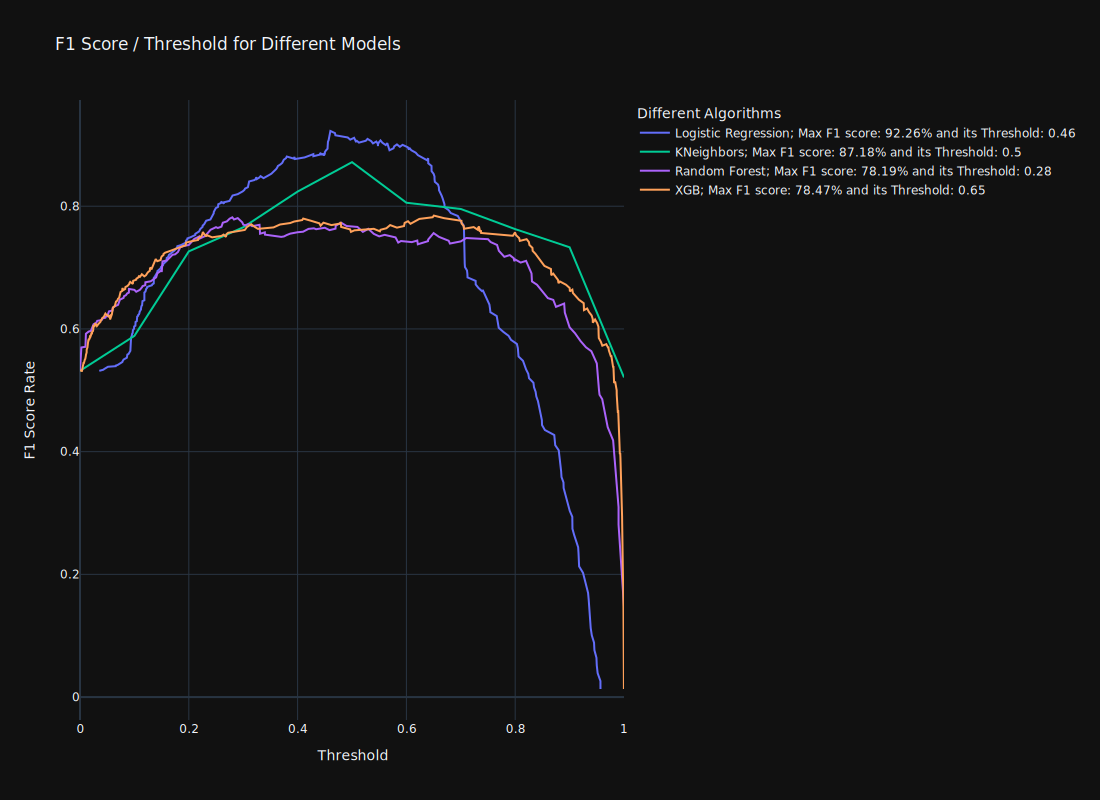


 The Process time taken to create the graphs was 0.02 minutes

 The Real time taken to create the graphs was 0.0 minutes


In [494]:
start = time.process_time()
real_time = dt.now()

plot_best_models2([log,knn,rfc,xgb],['Logistic Regression','KNeighbors','Random Forest','XGB'],X_test,y_test)

print('\n The Process time taken to create the graphs was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken to create the graphs was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

- The best algorithm without adjusting its hyperparameteres is Logistic Regression with a F1 score of 92.26%, which it's very good.
- The worst algorithm without adjusting its hyperparameteres is XGBoosting Classifier with a F1 score of 87.18%, which it's not bad at all.
***

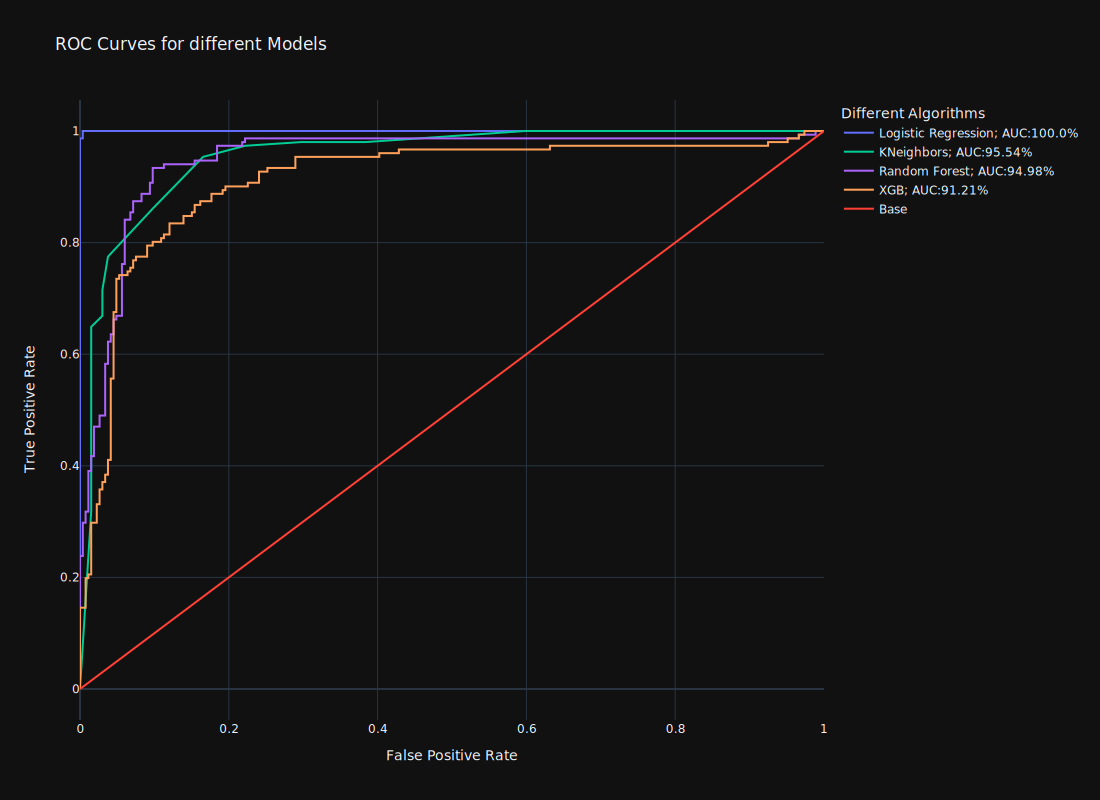

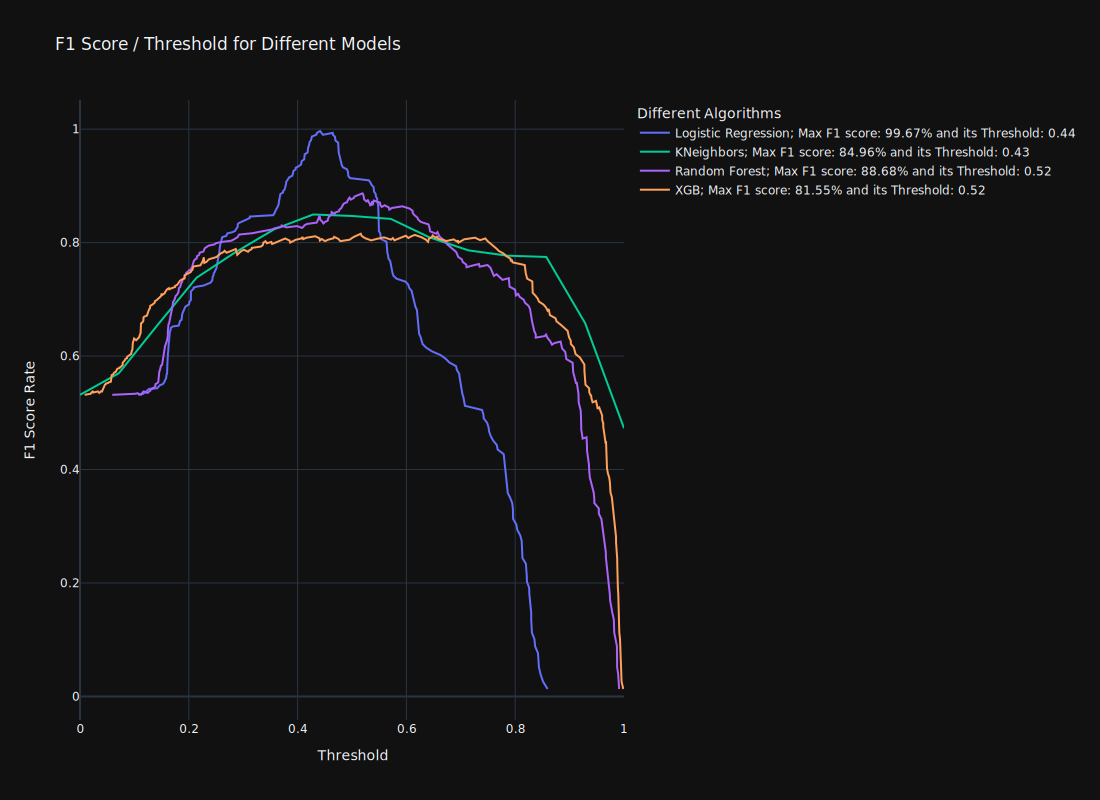


 The Process time taken to create the graphs was 0.02 minutes

 The Real time taken to create the graphs was 0.0 minutes


In [596]:
start = time.process_time()
real_time = dt.now()

plot_best_models2([best_log,best_knn,best_forest,best_xgb],['Logistic Regression','KNeighbors','Random Forest','XGB'],X_test,y_test)

print('\n The Process time taken to create the graphs was {} minutes'.format( round((time.process_time() - start)/60,2) ) )
print('\n The Real time taken to create the graphs was {} minutes'.format( round(((dt.now() - real_time).seconds/60),2)  ))

After adjusting its hyperparameteres Logistic Regression was the algorithm with the best perfomance with a F1 score of 99.67%.
The worst model was XGBoost Classifier with a F1 score of 81.55%.

****